In [1]:
# from two_TrAdaBoostR2 import TwoStageTrAdaBoostR2 ##STrAdaBoost.R2
# from TwoStageTrAdaBoostR2 import TwoStageTrAdaBoostR2 ##two-stage TrAdaBoost.R2

import pandas as pd
import sys
import numpy as np
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

from keras.models import Sequential, load_model, Model
from keras.layers import Input, Dense, Activation, Conv2D, Dropout, Flatten
from keras import optimizers, utils, initializers, regularizers
import keras.backend as K

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler #Importing the StandardScaler

from itertools import combinations

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats.stats import pearsonr
from math import sqrt

#Geo plotting libraries
import geopandas as gdp
from matplotlib.colors import ListedColormap
# import geoplot as glpt

import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import KFold
import matplotlib.lines as mlines

import statistics 

from scipy.stats import rv_continuous
from scipy.stats import *

from statistics import mean
from sklearn.cluster import KMeans
from scipy.spatial import distance


######### Instance Transfer repositories ####################
from adapt.instance_based import TwoStageTrAdaBoostR2

print("Repositories uploaded!!")

Repositories uploaded!!


In [2]:
from adapt.instance_based import TrAdaBoost, TrAdaBoostR2, TwoStageTrAdaBoostR2
from sklearn.model_selection import GridSearchCV
from adapt.instance_based import KMM

print("Second Upload Completed!!")

Second Upload Completed!!


In [ ]:
##################### Attempt at Parallelizing #####################

from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostRegressor
import multiprocessing as mp

import time  

def test_function(i):   
    print("function starts" + str(i))  
    time.sleep(1)  
    print("function ends" + str(i))  

if __name__ == '__main__':  
    pool = mp.Pool(mp.cpu_count()-12)  
    pool.map(test_function, [i for i in range(4)])  
    pool.close()  
    pool.join()  

print(mp.cpu_count())



results_mse = []
results_r2 = []
def log_result(x, y):
    results_mse.append(x)
    results_r2.append(x)
    
    
def benchmark_models_Ada(X_train, y_train, X_test, y_test):
    """
    Helper function to benchmark models
    X : array
    y : array
    split : tuple
     Training and test indices (train_idx, test_idx)
    """
    print(y_train)
    print(y_test)
    
    model_Ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth = 8), learning_rate = 0.01, n_estimators = 500) 
    model_Ada.fit(X_train, y_train)
    
    y_pred = model_Ada_concrete.predict(X_test)
    
    mse_Ada = sqrt(mean_squared_error(y_test, y_pred))
    print(mse_Ada)
        
    r2_score_Ada = pearsonr(y_test, y_pred)
    r2_score_Ada = (r2_score_Ada[0])**2
    print(r2_score_Ada)
    
    return mse_Ada,r2_score_Ada


pool = mp.Pool(mp.cpu_count() - 4)

for x in range(0,10):
    pool.apply_async(benchmark_models_Ada, args = (concrete_np_train_X, concrete_np_train_y_list, concrete_np_test_X, concrete_np_test_y_list), callback = log_result)
    
print(results_mse)
print(results_r2)

# # Close the pool for new tasks
# pool.close()
# # Wait for all tasks to complete at this point
# pool.join()

In [60]:
################################### Concrete ###########################################################################################################
ConcreteData_df = pd.read_excel('UCI_regression/Concrete/Concrete_Data.xls') ## 'Cement' found to be correlated at 0.4 :: 100
print("Concrete Data")
print("-------------------------------------------")
print(ConcreteData_df.shape)

# concrete_cols = ConcreteData_df.columns
# ss = StandardScaler()
# ConcreteData_df[concrete_cols] = ss.fit_transform(ConcreteData_df[concrete_cols])
# print(ConcreteData_df)


drop_col_concrete = ['Cement']

concrete_tgt_df = ConcreteData_df.loc[(ConcreteData_df['Cement'] <= 225)]
concrete_tgt_df = concrete_tgt_df.drop(drop_col_concrete, axis = 1)
concrete_tgt_df = concrete_tgt_df.reset_index(drop=True)
print("Target Set: ",concrete_tgt_df.shape)

concrete_source_df = ConcreteData_df.loc[(ConcreteData_df['Cement'] > 225) & (ConcreteData_df['Cement'] <= 350)]
concrete_source_df = concrete_source_df.drop(drop_col_concrete, axis = 1)
concrete_source_df = concrete_source_df.reset_index(drop=True)
print("Source Set: ",concrete_source_df.shape)

concrete_test_df = ConcreteData_df.loc[(ConcreteData_df['Cement'] > 350)]
concrete_test_df = concrete_test_df.drop(drop_col_concrete, axis = 1)
concrete_test_df = concrete_test_df.reset_index(drop=True)
print("Test Set: ",concrete_test_df.shape)

#################### Splitting into features and target ####################
target_column_concrete = ['ConcreteCompressiveStrength']

concrete_tgt_df_y = concrete_tgt_df[target_column_concrete]
concrete_tgt_df_X = concrete_tgt_df.drop(target_column_concrete, axis = 1)

concrete_source_df_y = concrete_source_df[target_column_concrete]
concrete_source_df_X = concrete_source_df.drop(target_column_concrete, axis = 1)

concrete_test_df_y = concrete_test_df[target_column_concrete]
concrete_test_df_X = concrete_test_df.drop(target_column_concrete, axis = 1)

############## Merging the datasets ##########################################
concrete_X_df = pd.concat([concrete_tgt_df_X, concrete_source_df_X], ignore_index=True)
concrete_y_df = pd.concat([concrete_tgt_df_y, concrete_source_df_y], ignore_index=True)

concrete_np_train_X = concrete_X_df.to_numpy()
concrete_np_train_y = concrete_y_df.to_numpy()

concrete_np_test_X = concrete_test_df_X.to_numpy()
concrete_np_test_y = concrete_test_df_y.to_numpy()

concrete_np_train_y_list = concrete_np_train_y.ravel()
concrete_np_test_y_list = concrete_np_test_y.ravel()

src_size_concrete = len(concrete_source_df_y)
tgt_size_concrete = len(concrete_tgt_df_y)

print("-------------------------------------------")

################################################################################################################################################################

Concrete Data
-------------------------------------------
(1030, 9)
Target Set:  (368, 8)
Source Set:  (406, 8)
Test Set:  (256, 8)
-------------------------------------------


In [ ]:
import multiprocessing as mp  
import time  

def test_function(i):   
    print("function starts" + str(i))  
    time.sleep(1)  
    print("function ends" + str(i))  

if __name__ == '__main__':  
    pool = mp.Pool(mp.cpu_count()-12)  
    pool.map(test_function, [i for i in range(4)])  
    pool.close()  
    pool.join()  


In [15]:
mp.cpu_count()

16

In [16]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostRegressor
import multiprocessing as mp


results_mse = []
results_r2 = []
def log_result(x, y):
    results_mse.append(x)
    results_r2.append(x)
    
    
def benchmark_models_Ada(X_train, y_train, X_test, y_test):
    """
    Helper function to benchmark models
    X : array
    y : array
    split : tuple
     Training and test indices (train_idx, test_idx)
    """
    print(y_train)
    print(y_test)
    
    model_Ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth = 8), learning_rate = 0.01, n_estimators = 500) 
    model_Ada.fit(X_train, y_train)
    
    y_pred = model_Ada_concrete.predict(X_test)
    
    mse_Ada = sqrt(mean_squared_error(y_test, y_pred))
    print(mse_Ada)
        
    r2_score_Ada = pearsonr(y_test, y_pred)
    r2_score_Ada = (r2_score_Ada[0])**2
    print(r2_score_Ada)
    
    return mse_Ada,r2_score_Ada


pool = mp.Pool(mp.cpu_count() - 4)

for x in range(0,10):
    pool.apply_async(benchmark_models_Ada, args = (concrete_np_train_X, concrete_np_train_y_list, concrete_np_test_X, concrete_np_test_y_list), callback = log_result)
    
print(results_mse)
print(results_r2)

# # Close the pool for new tasks
# pool.close()
# # Wait for all tasks to complete at this point
# pool.join()


[]
[]


In [14]:
############# Transfer Learning specifications Concrete #########################

from adapt.instance_based import TrAdaBoost, TrAdaBoostR2, TwoStageTrAdaBoostR2


src_idx = np.arange(start=0, stop=(src_size_concrete - 1), step=1)
tgt_idx = np.arange(start=src_size_concrete, stop=((src_size_concrete + tgt_size_concrete)-1), step=1)


def get_estimator(**kwargs):
    return DecisionTreeRegressor(max_depth = 6)

kwargs_TwoTrAda = {'steps': 30,
                    'fold': 10,
                  'learning_rate': 0.1}

print("Specification requirement complete!")

Specification requirement complete!


In [15]:
################################## Finding best instances from the source dataset ######################################################
concrete_source_df["ManDis"] = ""

concrete_tgt_df_mean = []
prow = concrete_tgt_df.mean()
concrete_tgt_df_mean = [prow.BlastFurnaceSlag, prow.FlyAsh, prow.Water, prow.Superplasticizer, prow.CoarseAggregate, prow.FineAggregate, 
                        prow.Age, prow.ConcreteCompressiveStrength]
# train_df_mean = [prow.crim, prow.zn, prow.indus, prow.chas, prow.rm, prow.age, prow.dis, prow.rad, prow.tax, prow.ptratio, prow.b, prow.lstat, prow.medv]
# concrete_tgt_df_mean = [prow.mpg, prow.cylinders, prow.displacement, prow.weight, prow.acceleration, prow.year, prow.origin]

rowidx = 0
for row in concrete_source_df.itertuples():
    row_list =[row.BlastFurnaceSlag, row.FlyAsh, row.Water, row.Superplasticizer, row.CoarseAggregate, row.FineAggregate, 
               row.Age, row.ConcreteCompressiveStrength]
    # row_list =[row.crim, row.zn, row.indus, row.chas, row.rm, row.age, row.dis, row.rad, row.tax, row.ptratio, row.b, row.lstat, row.medv]
    # row_list =[row.mpg, row.cylinders, row.displacement, row.weight, row.acceleration, row.year, row.origin]

    man_dis = 0
    for i in range(0, len(row_list)):
        tempval = concrete_tgt_df_mean[i] - row_list[i]
        man_dis = man_dis + abs(tempval)

    concrete_source_df.loc[rowidx,"ManDis"] = man_dis
    rowidx = rowidx + 1

concrete_source_df = concrete_source_df.sort_values(by =['ManDis'])
concrete_tgt_source_df = concrete_source_df.head(50) ## For housing 70 was taken, For auto 40 was taken, For concrete 100 was taken
concrete_source_df = concrete_source_df.iloc[50:]
concrete_source_df = concrete_source_df.drop(['ManDis'], axis =1)
concrete_tgt_source_df = concrete_tgt_source_df.drop(['ManDis'], axis =1)

concrete_tgt_df = pd.concat([concrete_tgt_df, concrete_tgt_source_df], ignore_index=True) ### This line is used only for STrAdaBoost.R2 and not for TrAdaBoost.R2
concrete_source_df = concrete_source_df.reset_index(drop=True)

print("Target Set: ",concrete_tgt_df.shape)
print("Source Set: ",concrete_source_df.shape)
print("Test Set: ",concrete_test_df.shape)


#################### Splitting into features and target ####################
target_column_concrete = ['ConcreteCompressiveStrength']

concrete_tgt_df_y = concrete_tgt_df[target_column_concrete]
concrete_tgt_df_X = concrete_tgt_df.drop(target_column_concrete, axis = 1)

concrete_source_df_y = concrete_source_df[target_column_concrete]
concrete_source_df_X = concrete_source_df.drop(target_column_concrete, axis = 1)

concrete_test_df_y = concrete_test_df[target_column_concrete]
concrete_test_df_X = concrete_test_df.drop(target_column_concrete, axis = 1)

############## Merging the datasets ##########################################
concrete_X_df = pd.concat([concrete_tgt_df_X, concrete_source_df_X], ignore_index=True)
concrete_y_df = pd.concat([concrete_tgt_df_y, concrete_source_df_y], ignore_index=True)

concrete_np_train_X = concrete_X_df.to_numpy()
concrete_np_train_y = concrete_y_df.to_numpy()

concrete_np_test_X = concrete_test_df_X.to_numpy()
concrete_np_test_y = concrete_test_df_y.to_numpy()

concrete_np_train_y_list = concrete_np_train_y.ravel()
concrete_np_test_y_list = concrete_np_test_y.ravel()

src_size_concrete = len(concrete_source_df_y)
tgt_size_concrete = len(concrete_tgt_df_y)

print("-------------------------------------------")

###############################################################################################################################################################

Target Set:  (418, 8)
Source Set:  (356, 8)
Test Set:  (256, 8)
-------------------------------------------


In [40]:
#################################### STrAdaBoost.R2 Active Sampling Concrete ################################################################

from two_TrAdaBoostR2 import TwoStageTrAdaBoostR2

sample_size = [len(concrete_tgt_df_X), len(concrete_source_df_X)]
n_estimators = 100
steps = 30
fold = 10
random_state = np.random.RandomState(1)

r2scorelist_stradaboost_concrete = []
rmselist_stradaboost_concrete = []

print("STrAdaboost.R2 (M + H, L)")
print("-------------------------------------------")


for x in range(0, 10):

    model_stradaboost_concrete = TwoStageTrAdaBoostR2(DecisionTreeRegressor(max_depth=6),
                        n_estimators = n_estimators, sample_size = sample_size,
                        steps = steps, fold = fold, random_state = random_state)


    model_stradaboost_concrete.fit(concrete_np_train_X, concrete_np_train_y_list)
    y_pred_stradaboost_concrete = model_stradaboost_concrete.predict(concrete_np_test_X)


    mse_stradaboost_concrete = sqrt(mean_squared_error(concrete_np_test_y, y_pred_stradaboost_concrete))
    rmselist_stradaboost_concrete.append(mse_stradaboost_concrete)
        
    r2_score_stradaboost_concrete = pearsonr(concrete_np_test_y_list, y_pred_stradaboost_concrete)
    r2_score_stradaboost_concrete = (r2_score_stradaboost_concrete[0])**2
    r2scorelist_stradaboost_concrete.append(r2_score_stradaboost_concrete)

    
print("RMSE of STrAdaboostR2:", statistics.mean(rmselist_stradaboost_concrete))
print("R^2 of STrAdaboostR2:", statistics.mean(r2scorelist_stradaboost_concrete))
print("\n")
print("RMSE of STrAdaboostR2:", rmselist_stradaboost_concrete)
print("R^2 of STrAdaboostR2:", r2scorelist_stradaboost_concrete)

STrAdaboost.R2 (M + H, L)
-------------------------------------------
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
RMSE of STrAdaboostR2: 15.159947702576176
R^2 of STrAdaboostR2: 0.5169015856003648


RMSE of STrAdaboostR2: [14.698929478273667, 16.160350399048713, 14.92140669182487, 14.603336859739674, 14.722755655162922, 15.428830925800177, 16.005960158249845, 15.573699506555018, 14.498041644141127, 14.98616570696574]
R^2 of STrAdaboostR2: [0.5538132790089343, 0.48419054962689345, 0.5565918499791379, 0.5565732229526383, 0.4587857742847487, 0.5295108332493782, 0.4501694398221305, 0.48096718839924, 0.5513684349812872, 0.54704528369926]


In [41]:
########################### TwoStagetrAdaBoostR2 Concrete #######################################

from adapt.instance_based import TrAdaBoost, TrAdaBoostR2, TwoStageTrAdaBoostR2


print("Two-Stage TrAdaboost.R2 (M + H, L)")
print("-------------------------------------------")

r2scorelist_TwoTrAda_concrete = []
rmselist_TwoTrAda_concrete = []

for x in range(0, 10):

    model_TwoTrAda_concrete = TwoStageTrAdaBoostR2(get_estimator = get_estimator, n_estimators = 1000, cv=10) #, kwargs_TwoTrAda)
    model_TwoTrAda_concrete.fit(concrete_np_train_X, concrete_np_train_y_list, src_idx, tgt_idx)

    y_pred_TwoTrAda_concrete = model_TwoTrAda_concrete.predict(concrete_np_test_X)
    
    mse_TwoTrAda_concrete = sqrt(mean_squared_error(concrete_np_test_y, y_pred_TwoTrAda_concrete))
    rmselist_TwoTrAda_concrete.append(mse_TwoTrAda_concrete)
        
    r2_score_TwoTrAda_concrete = pearsonr(concrete_np_test_y_list, y_pred_TwoTrAda_concrete)
    r2_score_TwoTrAda_concrete = (r2_score_TwoTrAda_concrete[0])**2
    r2scorelist_TwoTrAda_concrete.append(r2_score_TwoTrAda_concrete)


print("RMSE of Two-Stage TrAdaboost.R2:", statistics.mean(rmselist_TwoTrAda_concrete))
print("R^2 of TrAdaboostR2:", statistics.mean(r2scorelist_TwoTrAda_concrete))

print("RMSE of Two-Stage TrAdaboost.R2:", rmselist_TwoTrAda_concrete)
print("R^2 of TrAdaboostR2:", r2scorelist_TwoTrAda_concrete)


print("-------------------------------------------")

Two-Stage TrAdaboost.R2 (M + H, L)
-------------------------------------------


AssertionError: est: [2.58112480e-02 7.01334940e-02 3.22721574e-01 3.19763910e-02
 6.99532549e-02 1.25226002e-02 1.58030297e-01 7.95892911e-01
 7.25704676e-02 8.41565588e-02 9.53856659e-02 4.80811226e-02
 2.58936939e-01 2.51059221e-01 1.70092392e-01 4.36598388e-01
 3.24444505e-03 1.59825784e-02 2.84000515e-01 3.65729495e-02
 2.79403956e-01 5.15632641e-01 4.38577734e-01 3.61522827e-01
 9.16119272e-03 1.17069459e-01 1.08467342e-01 2.59914870e-02
 1.59825784e-02 1.13627856e-01 2.65554428e-02 4.71023229e-01
 4.00600870e-01 2.58936939e-01 1.34056102e-02 2.81594286e-02
 5.48545541e-01 2.30027981e-01 3.88547373e-01 4.86264463e-02
 1.08287103e-01 2.84000515e-01 2.30075124e-02 1.83307590e-02
 1.06227562e-01 1.66632414e-01 2.84000515e-01 6.97234406e-01
 1.41398874e-01 1.38127235e-01 3.73973392e-02 1.51682227e-02
 1.38127235e-01 4.60181332e-01 2.46491056e-01 2.51555020e-01
 1.02866155e-01 5.87241479e-02 1.35311649e-01 4.00600870e-01
 5.37703644e-01 5.93044532e-01 5.95439806e-01 6.15717540e-01
 2.12949439e-01 2.69931484e-01 2.00821221e-01 1.54399233e-03
 8.47153240e-02 4.58791840e-01 4.75122432e-02 5.79816337e-01
 4.34999577e-01 3.27490079e-01 6.24912183e-01 2.61070014e-01
 3.47767814e-01 2.77792079e-01 2.76484743e-01 2.46193898e-02
 5.04807947e-01 5.17705405e-01 6.37276592e-02 8.63329194e-03
 2.20437483e-01 7.45269309e-01 5.01752886e-02 6.35496369e-01
 4.76106935e-01 4.69848530e-01 1.96299384e-01 4.09722871e-03
 2.87644760e-01 2.62231645e-01 5.15035786e-01 7.04885357e-01
 5.10280029e-02 4.69209154e-01 4.08124809e-01 3.13686280e-01
 3.57411756e-01 4.93746205e-01 3.77440245e-01 5.07262253e-01
 4.05247397e-01 1.91652857e-01 2.20282599e-01 7.45230588e-01
 5.01365675e-02 8.29992247e-01 4.76068214e-01 3.54808265e-01
 1.96105779e-01 3.78746024e-03 2.87644760e-01 2.62502693e-01
 5.14997065e-01 7.05117683e-01 5.13764924e-02 4.68976828e-01
 4.07853762e-01 3.13453954e-01 3.57605361e-01 4.93397716e-01
 3.77324082e-01 5.07494580e-01 4.04860187e-01 1.91614136e-01
 5.95362364e-01 3.61436347e-01 2.12910718e-01 2.69582995e-01
 2.00821221e-01 1.58271339e-03 8.50250925e-02 4.59140329e-01
 4.75896853e-02 5.80203548e-01 4.35193183e-01 2.23175547e-01
 6.25105789e-01 2.61379782e-01 3.47651650e-01 2.78140568e-01
 2.76833233e-01 2.45806688e-02 5.04885389e-01 5.17356916e-01
 6.36889381e-02 8.47840770e-03 5.40473945e-02 2.66225730e-01
 4.09521121e-01 2.14810923e-03 1.60560532e-01 4.08282047e-01
 9.22044975e-02 1.25550001e-01 1.53041953e-01 2.02992118e-01
 2.56042091e-01 5.44007852e-01 4.79460478e-01 1.91984416e-02
 3.81354051e-01 1.28306556e-02 3.57729877e-01 8.88786587e-02
 5.41065052e-01 4.90543108e-01 3.31227140e-01 6.94990298e-01
 3.78699158e-01 3.78466832e-01 3.59479513e-01 6.39446768e-01
 2.87458344e-01 2.63094006e-01 1.36897394e-01 8.36125947e-02
 3.17721875e-01 4.11814047e-01 2.18905843e-01 1.01907105e-01
 4.26170769e-01 3.47216825e-01 3.90907539e-01 4.32199051e-02
 2.59593181e-01 1.61678871e-01 2.87085133e-01 3.44390187e-01
 1.80875722e-01 3.80790095e-01 2.87820833e-01 2.87085133e-01
 2.56239638e-01 3.59282259e-02 7.23376589e-02 2.13834015e-01
 6.39458015e-01 1.20943182e-02 5.01531481e-01 3.79577448e-01
 2.35922320e-01 3.80603115e-01 1.14174417e-01 1.14174417e-01
 6.38474272e-02 1.42025103e-01 1.74479023e-01 2.38168141e-01
 3.13587870e-01 1.27178408e-01 3.81222652e-01 2.02969069e-01
 4.59029056e-02 4.95426851e-02 4.59029056e-02 3.49016591e-02
 1.60265322e-01 2.29793896e-01 1.75519076e-01 9.93626283e-02
 2.33313410e-01 1.50492627e-04 2.33570343e-01 1.71684783e-01
 1.90028210e-02 4.33981886e-01 4.26531493e-01 5.14533034e-02
 1.44510732e-01 6.06706284e-01 4.09432083e-01 2.13706177e-01
 3.99779344e-01 8.69825472e-01 2.90229923e-01 1.17400152e-01
 3.44264550e-02 4.45114158e-01 4.90630643e-02 7.46496308e-01
 6.00988238e-02 6.00988238e-02 6.00988238e-02 6.00988238e-02
 2.59609111e-01 2.59609111e-01 2.59609111e-01 2.59609111e-01
 0.00000000e+00 4.09631395e-02 8.82302436e-01 2.72652127e-03
 5.56770857e-03 2.08884524e-01 2.76774387e-01 2.76774387e-01
 2.76774387e-01 2.76774387e-01 6.17167972e-01 2.82001988e-01
 9.70887435e-01 9.70887435e-01 9.70887435e-01 1.51682227e-02
 4.26469349e-01 1.18289542e-02 1.78198053e-01 8.30908216e-01
 1.72389894e-01 1.72389894e-01 1.72389894e-01 1.72389894e-01
 3.42233993e-01 2.05303970e-01 9.71086747e-02 2.16666356e-02
 0.00000000e+00 1.21747963e-02 1.15383905e-01 3.64252631e-01
 6.85191942e-01 5.78759990e-01 4.90641519e-01 4.90641519e-01
 1.95575414e-01 1.15553702e-01 1.51540414e-01 4.48862810e-01
 3.04512469e-01 1.37997163e-01 2.22768119e-02 1.41831755e-01
 3.57863765e-01 4.80523489e-01 2.63133706e-01 1.95252682e-01
 4.89779075e-01 4.80496821e-01 4.80303216e-01 4.28478282e-02
 4.51709808e-01 9.41873496e-02 2.80505844e-03 4.84191252e-01
 1.78391400e-01 4.31976822e-01 1.72499024e-02 4.69460329e-01
 6.53776419e-01 9.41134364e-01 2.77794938e-01 3.99041693e-16
 3.18156331e-01 6.87122623e-02 6.82197843e-02 6.82197843e-02
 2.44799450e-01 1.75152664e-02 1.28550283e-01 1.30873547e-01
 2.18316050e-01 4.31756962e-01 3.94771486e-01 2.99644657e-01
 0.00000000e+00 8.96289586e-02 9.05509394e-02 3.07159550e-01
 4.49200599e-02 2.72226200e-01 5.47897255e-01 3.10986440e-01
 1.88793819e-01 6.85420001e-02 0.00000000e+00 2.13504286e-01
 0.00000000e+00 3.20832630e-01 1.62170515e-01 3.86284914e-01
 3.34530544e-02 3.58873494e-01 4.45984238e-01 4.98593758e-02
 1.80580409e-01 0.00000000e+00 3.28421790e-02 1.16759580e-01
 2.87443734e-02 5.63798019e-02 2.85127268e-01 9.60453829e-02
 2.59434725e-01 2.40996238e-01 4.31187647e-01 3.42259070e-01
 1.42091677e-01 1.42091677e-01 4.90599446e-01 1.95524189e-01
 2.52031740e-01], [38.70028788 14.306627   17.43684804 31.74347504 37.91428524 39.38286912
 15.87173752  9.01145132 33.60506024 40.65839972 40.85834776 12.05204048
 17.54026944 18.91232668 25.17966352 30.9574724  14.49968028 22.43554904
 18.12632404 22.53207568 27.3377234  29.97841648 31.35047372 32.72253096
 38.99676256 41.24445432 14.98920824 13.52062436 22.43554904 21.16001844
 31.84000168 14.79615496 25.17966352 17.54026944 14.2032056  21.6495464
 29.39236188 13.52062436 16.26473884 31.44700036 37.231704   18.12632404
 32.72253096 39.48629052 41.05140104 42.1269836  18.12632404 26.74477404
 13.71367764 19.69143456 31.6469484  11.46598588 19.69143456 14.98920824
 27.923778   34.6806428  37.32823064 38.11423328 20.77391188 25.17966352
 29.58541516 21.7529678  37.16965116 33.68779736 33.41890172 45.2985732
 30.12320644 53.52402188 57.21271848 52.82075636 33.39821744 42.63719584
 40.0585556  41.94082508 61.23236356 52.42086028 38.45897128 37.25928304
 42.13387836 31.87447548 41.540929   44.27814872 31.17810472 32.39847724
 28.62704352 36.80422888 31.41942132 44.38846488 23.83518532 40.679084
 33.7153764  32.23989776 49.77327244 52.44154456 40.93419012 44.86420332
 56.61287436 39.41734292 46.2293658  44.51946532 43.5748832  35.85964676
 41.05140104 46.24315532 25.0969264  33.79811352 28.62980142 36.80491836
 31.4201108  40.92522693 23.8358748  38.6306508  33.71882378 32.24541357
 49.77327244 52.44637089 40.9348796  44.86834018 56.61907964 39.42147978
 46.23419213 44.52360218 43.57833058 35.86585204 41.05346947 46.24729218
 25.10382116 33.798803   37.17103011 38.21558625 33.4195912  45.30477848
 30.12320644 53.52471136 57.21823429 52.82696164 33.39959639 42.6440906
 40.06200298 43.79827342 61.23581094 52.42637609 38.46103971 37.26548832
 42.14008364 31.87516496 41.54230795 44.284354   31.1787942  32.40123514
 31.35047372 27.923778   39.60488039 23.22155168 36.3009114  39.58281716
 14.69962832 54.76507868 55.25460664 56.14403068 27.74244581 48.8466167
 61.06688932 31.97100212  6.26733684 44.42293868 51.021224   19.1991487
 48.79421652 53.38612668 38.21075992 57.02655996 39.0560575  39.05192064
 38.01770664 43.69898888 39.300132   35.36322404 25.62092816 19.10537996
 25.02108404 23.34565736 43.0577762  64.90037588 52.00717468 43.89204216
 30.14389072 33.08243743 36.93522932 26.0621928  37.42475728 43.94237391
 16.27852836 39.0932892  37.43785732 37.42475728 47.96684532 36.3009114
 61.79773388 56.33708396 34.56963716 46.80163088 61.45989064 56.83350668
 54.27555072 24.39366088 46.68441996 46.68441996 66.78067543 73.69808964
 68.75060685 54.31554033 50.23522136 25.44786968 24.4046925  66.69990824
 24.00065956 24.0654703  24.00065956 44.02993736 35.75425543 34.77027468
 72.29845336 36.83870268 59.49488404 38.610656   41.09966436 41.66503468
 22.48932817 68.4994406  62.93536928 51.021224   78.80021204 55.45455468
 45.89841732 67.568648   37.79707432 54.09628696 25.510612   25.11662572
 23.63917715 22.752708   68.29949256 63.3973182  77.29715436 77.29715436
 77.29715436 77.29715436 35.3011712  35.3011712  35.3011712  35.3011712
 55.59934464 75.497622   22.89749796 32.01138572 14.54104884 34.39795764
 71.29871316 71.29871316 71.29871316 71.29871316 61.09446836 74.19451236
 55.89581932 55.89581932 55.89581932 11.46598588 46.20178676 55.55108132
 79.40005616 64.90037588 79.29663476 79.29663476 79.29663476 79.29663476
 59.59042572 40.59634688 74.4978818  64.0178466  59.09498796 37.42751518
 55.55108132 52.90831981 65.69721315 33.48883428 41.36856    41.36856
 60.28088668 61.88736576 23.84897484 25.60910857 58.52272288 79.98611076
 39.00464228 71.69860924 82.5992248  62.05284    41.54299743 35.07640202
 74.36491146 40.8686899  40.86524252 36.44776979 71.98818916 40.28509772
 32.10988228 39.300132   65.99664272 69.83702404 55.64760796 61.85584685
 52.30364936 72.09850532 58.99846132 56.09576736 40.56325203 32.82319446
 64.30053176 64.30053176 41.2996124  46.89815752 44.13335876 44.0919902
 59.19840936 55.94408264 33.79811352 36.93522932 48.4012152  42.42345828
 33.21205892 40.75906322 47.22221124 58.78472376 41.63745564 26.0621928
 67.30664712 52.61391356 59.76377968 42.62064842 12.63809508 69.65776028
 60.19814956 53.30063166 54.89607912 56.69561148 28.99936056 45.69846928
 43.01296026 52.20022796 62.5009994  28.59946448 47.09810556 56.49566344
 41.15137506 61.92183956 51.04190828 42.13112046 71.62276688 52.51669744
 43.6982994  43.6982994  55.15808    67.11359384 41.9346198 ], [39.15988885 13.05781402 23.18330196 32.31285395 39.15988885 39.15988885
 13.05781402 23.18330196 32.31285395 39.15988885 39.15988885 11.19589705
 22.15095961 14.44190895 22.15095961 23.18330196 14.44190895 22.15095961
 23.18330196 23.18330196 32.31285395 39.15988885 39.15988885 39.15988885
 39.15988885 39.15988885 13.05781402 13.05781402 22.15095961 23.18330196
 32.31285395 23.18330196 32.31285395 22.15095961 14.44190895 22.15095961
 39.15988885 17.61655504 23.18330196 32.31285395 39.15988885 23.18330196
 32.31285395 39.15988885 39.15988885 39.15988885 23.18330196 39.15988885
 11.19589705 22.15095961 32.31285395 11.19589705 22.15095961 23.18330196
 32.31285395 39.15988885 39.15988885 39.15988885 23.18330196 32.31285395
 39.15988885 32.31285395 47.7721881  44.65140426 37.21072799 50.10503475
 26.547338   53.4965292  55.70425811 44.65140426 32.5522036  32.31285395
 32.31285395 47.7721881  50.10503475 47.7721881  44.65140426 32.31285395
 37.21072799 32.31285395 32.5522036  53.4965292  32.31285395 32.5522036
 32.5522036  50.07466411 32.31285395 55.70425811 32.31285395 32.31285395
 37.21072799 32.31285395 44.65140426 47.7721881  50.10503475 32.31285395
 55.70425811 47.7721881  53.4965292  50.10503475 37.21072799 44.65140426
 47.7721881  37.21072799 32.31285395 37.21072799 32.5522036  50.07466411
 32.31285395 55.70425811 32.31285395 32.31285395 37.21072799 32.31285395
 44.65140426 47.7721881  50.10503475 32.31285395 55.70425811 47.7721881
 53.4965292  50.10503475 37.21072799 44.65140426 47.7721881  37.21072799
 32.31285395 37.21072799 47.7721881  44.65140426 37.21072799 50.10503475
 26.547338   53.4965292  55.70425811 44.65140426 32.5522036  32.31285395
 32.31285395 47.7721881  50.10503475 47.7721881  44.65140426 32.31285395
 37.21072799 32.31285395 32.5522036  53.4965292  32.31285395 32.5522036
 32.31285395 23.18330196 32.31285395 23.18330196 39.15988885 32.31285395
 13.05781402 52.52950674 52.52950674 52.52950674 23.18330196 39.15988885
 52.52950674 32.31285395 13.05781402 44.65140426 44.65140426 17.61655504
 39.15988885 44.65140426 32.31285395 44.65140426 32.31285395 32.31285395
 44.41868081 32.31285395 44.41868081 30.67851218 23.18330196 17.61655504
 30.67851218 30.67851218 39.15988885 63.08579473 44.41868081 50.07466411
 23.18330196 32.31285395 32.31285395 23.18330196 32.31285395 50.07466411
 13.05781402 32.31285395 32.31285395 32.31285395 52.52950674 36.94065758
 63.08579473 52.52950674 23.18330196 46.58627669 52.52950674 50.07466411
 50.07466411 17.61655504 44.65140426 44.65140426 65.64379359 76.227021
 65.64379359 50.07466411 44.65140426 23.18330196 17.61655504 63.08579473
 23.18330196 23.18330196 23.18330196 44.65140426 38.60797629 30.67851218
 69.17312067 38.60797629 55.34045227 38.60797629 36.94065758 38.60797629
 22.15095961 76.227021   55.34045227 50.10503475 76.227021   44.65140426
 38.60797629 63.76334709 30.67851218 38.60797629 30.67851218 23.02617184
 23.02617184 30.67851218 69.17312067 50.10503475 76.227021   76.227021
 76.227021   76.227021   30.67851218 30.67851218 30.67851218 30.67851218
 55.59934464 76.227021   38.60797629 32.05993477 14.44190895 30.67851218
 76.227021   76.227021   76.227021   76.227021   50.10503475 69.17312067
 38.60797629 38.60797629 38.60797629 11.19589705 38.60797629 55.34045227
 76.227021   50.10503475 76.227021   76.227021   76.227021   76.227021
 53.4965292  36.94065758 76.227021   63.63204555 59.09498796 37.21072799
 53.4965292  46.42235441 53.4965292  23.18330196 50.10503475 50.10503475
 63.76334709 63.94494133 26.547338   17.61655504 63.94494133 77.52890182
 38.60797629 69.17312067 76.227021   53.4965292  46.2284162  31.59968825
 65.64379359 32.31285395 32.31285395 37.21072799 63.94494133 38.60797629
 32.05993477 30.67851218 69.17312067 77.52890182 55.34045227 53.4965292
 63.94494133 55.34045227 63.94494133 56.09576736 46.2284162  31.59968825
 63.08579473 63.08579473 36.94065758 46.58627669 46.42235441 46.42235441
 63.08579473 63.63204555 40.82750461 31.59968825 48.4012152  40.82750461
 31.59968825 46.2284162  46.42235441 63.63204555 51.39343908 31.59968825
 63.94494133 51.39343908 59.76377968 46.42235441 12.63809508 63.94494133
 63.08579473 46.42235441 55.49175183 63.08579473 36.94065758 46.58627669
 46.2284162  52.20022796 63.08579473 30.67851218 46.58627669 55.49175183
 46.2284162  63.63204555 46.42235441 46.42235441 63.94494133 46.42235441
 46.2284162  46.2284162  46.42235441 63.63204555 46.42235441]

In [17]:
########################### AdaBoostR2 Transfer Learning Concrete #####################################################

from sklearn.ensemble import AdaBoostRegressor


print("Adaboost.R2 Transfer Learning (L + M, H)")
print("-------------------------------------------")

r2scorelist_AdaTL_concrete = []
rmselist_AdaTL_concrete = []

for x in range(0, 10):

    model_AdaTL_concrete = AdaBoostRegressor(DecisionTreeRegressor(max_depth = 6), learning_rate=0.1, n_estimators = 100) 
    model_AdaTL_concrete.fit(concrete_np_train_X, concrete_np_train_y_list)
    
    y_pred_AdaTL_concrete = model_AdaTL_concrete.predict(concrete_np_test_X)
    
    mse_AdaTL_concrete = sqrt(mean_squared_error(concrete_np_test_y, y_pred_AdaTL_concrete))
    rmselist_AdaTL_concrete.append(mse_AdaTL_concrete)
        
    r2_score_AdaTL_concrete = pearsonr(concrete_np_test_y_list, y_pred_AdaTL_concrete)
    r2_score_AdaTL_concrete = (r2_score_AdaTL_concrete[0])**2
    r2scorelist_AdaTL_concrete.append(r2_score_AdaTL_concrete)
    

print("RMSE of Adaboost.R2:", statistics.mean(rmselist_AdaTL_concrete))
print("R^2 of TrAdaboostR2:", statistics.mean(r2scorelist_AdaTL_concrete))
print("\n")
print("RMSE of Adaboost.R2:", rmselist_AdaTL_concrete)
print("R^2 of TrAdaboostR2:", r2scorelist_AdaTL_concrete)


print("-------------------------------------------")

Adaboost.R2 Transfer Learning (L + M, H)
-------------------------------------------
RMSE of Adaboost.R2: 14.7417334008886
R^2 of TrAdaboostR2: 0.6612229804716765


RMSE of Adaboost.R2: [14.61204885686767, 14.53892084575103, 14.49168127277562, 14.792139431918914, 14.81703358136239, 14.728854598036188, 14.907855327070358, 14.694950197532739, 14.905522192980705, 14.928327704590389]
R^2 of TrAdaboostR2: [0.6607138352856027, 0.6712170425673668, 0.6856003262512574, 0.6524719570727391, 0.6523999022242073, 0.6655211535692691, 0.6498760820813567, 0.663586221727445, 0.6516434704155348, 0.6591998135219864]
-------------------------------------------


In [18]:
########################### AdaBoostR2 Concrete #####################################################

from sklearn.ensemble import AdaBoostRegressor


print("Adaboost.R2 (L + M, H)")
print("-------------------------------------------")

r2scorelist_Ada_concrete = []
rmselist_Ada_concrete = []

for x in range(0, 10):

    model_Ada_concrete = AdaBoostRegressor(DecisionTreeRegressor(max_depth = 6), learning_rate = 0.1, n_estimators = 100) 
    model_Ada_concrete.fit(concrete_tgt_df_X, concrete_tgt_df_y)
    
    y_pred_ada_concrete = model_Ada_concrete.predict(concrete_np_test_X)
    
    mse_Ada_concrete = sqrt(mean_squared_error(concrete_np_test_y, y_pred_ada_concrete))
    rmselist_Ada_concrete.append(mse_Ada_concrete)
        
    r2_score_Ada_concrete = pearsonr(concrete_np_test_y_list, y_pred_ada_concrete)
    r2_score_Ada_concrete = (r2_score_Ada_concrete[0])**2
    r2scorelist_Ada_concrete.append(r2_score_Ada_concrete)


print("RMSE of Adaboost.R2:", statistics.mean(rmselist_Ada_concrete))
print("R^2 of TrAdaboostR2:", statistics.mean(r2scorelist_Ada_concrete))
print("\n")
print("RMSE of Adaboost.R2:", rmselist_Ada_concrete)
print("R^2 of TrAdaboostR2:", r2scorelist_Ada_concrete)

print("-------------------------------------------")

Adaboost.R2 (L + M, H)
-------------------------------------------


/Users/shrey/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/shrey/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/shrey/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/shrey/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

RMSE of Adaboost.R2: 20.8979279091676
R^2 of TrAdaboostR2: 0.5374287768728181


RMSE of Adaboost.R2: [20.747444751383203, 20.575392076176716, 20.857809316764023, 20.922487571321774, 20.47099987407111, 21.196252252632377, 21.03111386432314, 20.82181612265841, 21.036492038639693, 21.319471223705545]
R^2 of TrAdaboostR2: [0.5355512209477602, 0.5333937015989193, 0.5402902572361833, 0.5284955450492326, 0.5319449706255279, 0.5444637977471708, 0.5409425938563348, 0.5278741655447692, 0.5574646548833901, 0.5338668612388922]
-------------------------------------------


In [44]:
######################### Kernel Mean Matching Concrete #######################################

from adapt.instance_based import KMM


print("Kernel Mean Matching")
print("-------------------------------------------")

r2scorelist_KMM_concrete = []
rmselist_KMM_concrete = []

for x in range(0, 10):

    model_KMM_concrete = KMM(get_estimator = get_estimator)
    model_KMM_concrete.fit(concrete_np_train_X, concrete_np_train_y_list, src_idx, tgt_idx)

    y_pred_KMM_concrete = model_KMM_concrete.predict(concrete_test_df_X) ##Using dataframe instead of the numpy matrix
    
    mse_KMM_concrete = sqrt(mean_squared_error(concrete_np_test_y, y_pred_KMM_concrete))
    rmselist_KMM_concrete.append(mse_KMM_concrete)
        
    r2_score_KMM_concrete = pearsonr(concrete_np_test_y_list, y_pred_KMM_concrete)
    r2_score_KMM_concrete = (r2_score_KMM_concrete[0])**2
    r2scorelist_KMM_concrete.append(r2_score_KMM_concrete)


print("RMSE of KMM:", statistics.mean(rmselist_KMM_concrete))
print("R^2 of TrAdaboostR2:", statistics.mean(r2scorelist_KMM_concrete))
print("\n")
print("RMSE of KMM:", rmselist_KMM_concrete)
print("R^2 of TrAdaboostR2:", r2scorelist_KMM_concrete)

#model_KMM_concrete.weights_   #To get the weights of the algorithm

print("-------------------------------------------")

Kernel Mean Matching
-------------------------------------------
RMSE of KMM: 24.7475451605937
R^2 of TrAdaboostR2: 0.22919987873063472


RMSE of KMM: [24.66025313425615, 24.26532612416335, 24.898486647363306, 24.442558548765764, 24.8307469495567, 25.381315386446207, 24.975409531067413, 24.442558548765764, 24.91854360129619, 24.66025313425615]
R^2 of TrAdaboostR2: [0.19914113503199005, 0.22133400200102124, 0.25475737856058783, 0.21070128693759393, 0.24625669919547638, 0.25742845729185554, 0.25239513458747653, 0.21070128693759393, 0.24014227173076164, 0.19914113503199007]
-------------------------------------------


In [20]:
######################### Gradient Boosting Regression Transfer Learning Concrete #######################################

from sklearn.ensemble import GradientBoostingRegressor


print("Gradient Boosting Regression Transfer Learning (L + M, H)")
print("-------------------------------------------")

r2scorelist_GBRTL_concrete = []
rmselist_GBRTL_concrete = []

for x in range(0, 10):

    model_GBRTL_concrete = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 6, n_estimators = 100, subsample = 0.5)
    model_GBRTL_concrete.fit(concrete_np_train_X, concrete_np_train_y_list)

    y_pred_GBRTL_concrete = model_GBRTL_concrete.predict(concrete_test_df_X) ##Using dataframe instead of the numpy matrix
    
    mse_GBRTL_concrete = sqrt(mean_squared_error(concrete_np_test_y, y_pred_GBRTL_concrete))
    rmselist_GBRTL_concrete.append(mse_GBRTL_concrete)
        
    r2_score_GBRTL_concrete = pearsonr(concrete_np_test_y_list, y_pred_GBRTL_concrete)
    r2_score_GBRTL_concrete = (r2_score_GBRTL_concrete[0])**2
    r2scorelist_GBRTL_concrete.append(r2_score_GBRTL_concrete)


print("RMSE of GBR:", statistics.mean(rmselist_GBRTL_concrete))
print("R^2 of GBR:", statistics.mean(r2scorelist_GBRTL_concrete))
print("\n")
print("RMSE of GBR:", rmselist_GBRTL_concrete)
print("R^2 of GBR:", r2scorelist_GBRTL_concrete)

print("-------------------------------------------")

Gradient Boosting Regression Transfer Learning (L + M, H)
-------------------------------------------
RMSE of GBR: 11.558926895114045
R^2 of GBR: 0.6840048567476726


RMSE of GBR: [11.558990562938687, 11.489873922390014, 11.461109751119176, 11.79414270669496, 11.04219292049326, 11.271122244096873, 11.959249786459829, 11.469168331354966, 11.890342631019319, 11.65307609457336]
R^2 of GBR: [0.6800331775222811, 0.6755150667447648, 0.6896596101643081, 0.6841458954351896, 0.6864821821215114, 0.7043850952969625, 0.6757059833393145, 0.7004570002764335, 0.680403182079822, 0.6632613744961385]
-------------------------------------------


In [21]:
######################### Gradient Boosting Regression Concrete #######################################

from sklearn.ensemble import GradientBoostingRegressor


print("Gradient Boosting Regression (L + M, H)")
print("-------------------------------------------")

r2scorelist_GBR_concrete = []
rmselist_GBR_concrete = []

for x in range(0, 10):

    model_GBR_concrete = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 6, n_estimators = 100, subsample=0.5)
    model_GBR_concrete.fit(concrete_tgt_df_X, concrete_tgt_df_y)

    y_pred_GBR_concrete = model_GBR_concrete.predict(concrete_test_df_X) ##Using dataframe instead of the numpy matrix
    
    mse_GBR_concrete = sqrt(mean_squared_error(concrete_np_test_y, y_pred_GBR_concrete))
    rmselist_GBR_concrete.append(mse_GBR_concrete)
        
    r2_score_GBR_concrete = pearsonr(concrete_np_test_y_list, y_pred_GBR_concrete)
    r2_score_GBR_concrete = (r2_score_GBR_concrete[0])**2
    r2scorelist_GBR_concrete.append(r2_score_GBR_concrete)


print("RMSE of KMM:", statistics.mean(rmselist_GBR_concrete))
print("R^2 of TrAdaboostR2:", statistics.mean(r2scorelist_GBR_concrete))
print("\n")
print("RMSE of KMM:", rmselist_GBR_concrete)
print("R^2 of TrAdaboostR2:", r2scorelist_GBR_concrete)

print("-------------------------------------------")

Gradient Boosting Regression (L + M, H)
-------------------------------------------


/Users/shrey/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/shrey/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/shrey/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/shrey/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

RMSE of KMM: 19.926120315002475
R^2 of TrAdaboostR2: 0.5783177045604294


RMSE of KMM: [18.697177425168174, 19.179014517360443, 19.813449781988307, 20.153171377068382, 20.463103388916583, 20.6754556876159, 19.32834500864539, 20.001413385535475, 20.18517051261587, 20.764902065110235]
R^2 of TrAdaboostR2: [0.5759287957798785, 0.5719768313620142, 0.5757652749762813, 0.551109183280435, 0.5730728295327007, 0.5352097481212257, 0.5963443629091851, 0.6038941399675324, 0.5944367485787211, 0.6054391310963197]
-------------------------------------------


In [47]:
################ Transformed TrAdaBoost.R2 Concrete #############################################

from adapt.instance_based import TrAdaBoost, TrAdaBoostR2, TwoStageTrAdaBoostR2


weights_KMM = model_KMM_concrete.weights_

val_mean = np.mean(weights_KMM)
weights_KMM = np.append(weights_KMM, val_mean)

concrete_source_df_X_trans = concrete_source_df_X.apply(lambda concrete_source_df_X: concrete_source_df_X * weights_KMM)
#concrete_source_df_X.multiply(weights_KMM, axis=0)

# concrete_np_train_X_trans = concrete_source_df_X_trans.to_numpy()

concrete_X_df = pd.concat([concrete_tgt_df_X, concrete_source_df_X_trans], ignore_index=True)
concrete_y_df = pd.concat([concrete_tgt_df_y, concrete_source_df_y], ignore_index=True)

concrete_np_train_X = concrete_X_df.to_numpy()
concrete_np_train_y = concrete_y_df.to_numpy()

concrete_np_test_X = concrete_test_df_X.to_numpy()
concrete_np_test_y = concrete_test_df_y.to_numpy()

concrete_np_train_y_list = concrete_np_train_y.ravel()
concrete_np_test_y_list = concrete_np_test_y.ravel()


# print(concrete_np_train_y_list.shape, concrete_np_train_X_trans.shape)

##################################################################

print("Transformed Two-Stage TrAdaboost.R2")
print("-------------------------------------------")

r2scorelist_TransTrAda_concrete = []
rmselist_TransTrAda_concrete = []

for x in range(0, 10):

    model_TransTrAda_concrete = TwoStageTrAdaBoostR2(get_estimator = get_estimator, n_estimators = 100, cv=10) #, kwargs_TwoTrAda)
    model_TransTrAda_concrete.fit(concrete_np_train_X, concrete_np_train_y_list, src_idx, tgt_idx)

    y_pred_TransTrAda_concrete = model_TransTrAda_concrete.predict(concrete_np_test_X)

    mse_TransTrAda_concrete = sqrt(mean_squared_error(concrete_np_test_y, y_pred_TransTrAda_concrete))
    rmselist_TransTrAda_concrete.append(mse_TransTrAda_concrete)
        
    r2_score_TransTrAda_concrete = pearsonr(concrete_np_test_y_list, y_pred_TransTrAda_concrete)
    r2_score_TransTrAda_concrete = (r2_score_TransTrAda_concrete[0])**2

    r2scorelist_TransTrAda_concrete.append(r2_score_TransTrAda_concrete)


print("RMSE of Two-Stage TrAdaboost.R2:", statistics.mean(rmselist_TransTrAda_concrete))
print("R^2 of TrAdaboostR2:", statistics.mean(r2scorelist_TransTrAda_concrete))
print("\n")
print("RMSE of Two-Stage TrAdaboost.R2:", rmselist_TransTrAda_concrete)
print("R^2 of TrAdaboostR2:", r2scorelist_TransTrAda_concrete)


print("-------------------------------------------")

Transformed Two-Stage TrAdaboost.R2
-------------------------------------------
Binary search has not converged. Set value to the current best.
RMSE of Two-Stage TrAdaboost.R2: 20.66416524300936
R^2 of TrAdaboostR2: 0.3750906537920632


RMSE of Two-Stage TrAdaboost.R2: [21.364219944272392, 20.232623630908922, 21.52352495485198, 23.086793392289856, 19.87180292274346, 20.053265659358196, 20.343371802059924, 20.340172040648504, 20.084102887966367, 19.741775194994002]
R^2 of TrAdaboostR2: [0.39854261877359787, 0.4032779665385544, 0.3923450075953078, 0.3879446523226336, 0.1676471182936492, 0.4092323780055153, 0.3957850885063505, 0.397045316693211, 0.3985356091402983, 0.4005507820515138]
-------------------------------------------


In [48]:
#################################### STrAdaBoost.R2 Concrete ################################################################

from two_TrAdaBoostR2 import TwoStageTrAdaBoostR2

sample_size = [len(concrete_tgt_df_X), len(concrete_source_df_X)]
n_estimators = 100
steps = 30
fold = 10
random_state = np.random.RandomState(1)

r2scorelist_stradaboost_concrete = []
rmselist_stradaboost_concrete = []

for x in range(0, 10):

    model_stradaboost_concrete = TwoStageTrAdaBoostR2(DecisionTreeRegressor(max_depth=6),
                        n_estimators = n_estimators, sample_size = sample_size,
                        steps = steps, fold = fold, random_state = random_state)


    model_stradaboost_concrete.fit(concrete_np_train_X, concrete_np_train_y_list)
    y_pred_stradaboost_concrete = model_stradaboost_concrete.predict(concrete_np_test_X)


    mse_stradaboost_concrete = sqrt(mean_squared_error(concrete_np_test_y, y_pred_stradaboost_concrete))
    rmselist_stradaboost_concrete.append(mse_stradaboost_concrete)
        
    r2_score_stradaboost_concrete = pearsonr(concrete_np_test_y_list, y_pred_stradaboost_concrete)
    r2_score_stradaboost_concrete = (r2_score_stradaboost_concrete[0])**2
    r2scorelist_stradaboost_concrete.append(r2_score_stradaboost_concrete)

    
print("RMSE of STrAdaboostR2:", statistics.mean(rmselist_stradaboost_concrete))
print("R^2 of STrAdaboostR2:", statistics.mean(r2scorelist_stradaboost_concrete))
print("\n")
print("RMSE of STrAdaboostR2:", rmselist_stradaboost_concrete)
print("R^2 of STrAdaboostR2:", r2scorelist_stradaboost_concrete)

Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
RMSE of STrAdaboostR2: 21.266018402448736
R^2 of STrAdaboostR2: 0.5627616097557516


RMSE of STrAdaboostR2: [21.42773534089844, 21.22772792772531, 21.340637343717308, 21.573091068938062, 21.020658773915265, 21.324251373061088, 20.60875387127294, 21.761197258373908, 20.878898876418837, 21.49723219016621]
R^2 of STrAdaboostR2: [0.5691884495364181, 0.5571615337776278, 0.5620443436817402, 0.556535044286506, 0.5770695679301143, 0.5663981867836123, 0.581583459777069, 0.5575160515109633, 0.5489991702878345, 0.551120289985631]


In [61]:
################################### Housing ################################################################
## 'nox' found to be correlated at 0.4 :: [0.385 - 0.871] :: 50
#################################################################################################################################
HousingData_df = pd.read_csv('UCI_regression/BostonHousing/BostonHousing.csv') 
print("Housing Data")
print(HousingData_df.shape)

drop_col_housing = ['nox']
housing_tgt_df = HousingData_df.loc[(HousingData_df['nox'] <= 0.475)]
housing_tgt_df = housing_tgt_df.drop(drop_col_housing, axis = 1)
housing_tgt_df = housing_tgt_df.reset_index(drop=True)
print("Target Set: ",housing_tgt_df.shape)


housing_source_df = HousingData_df.loc[(HousingData_df['nox'] > 0.475) & (HousingData_df['nox'] <= 0.600)]
housing_source_df = housing_source_df.drop(drop_col_housing, axis = 1)
housing_source_df = housing_source_df.reset_index(drop=True)
print("Source Set: ",housing_source_df.shape)


housing_test_df = HousingData_df.loc[(HousingData_df['nox'] > 0.600)]
housing_test_df = housing_test_df.drop(drop_col_housing, axis = 1)
housing_test_df = housing_test_df.reset_index(drop=True)
print("Test Set: ",housing_test_df.shape)

#################### Splitting into features and target ####################
target_column_housing = ['medv']

housing_tgt_df_y = housing_tgt_df[target_column_housing]
housing_tgt_df_X = housing_tgt_df.drop(target_column_housing, axis = 1)

housing_source_df_y = housing_source_df[target_column_housing]
housing_source_df_X = housing_source_df.drop(target_column_housing, axis = 1)

housing_test_df_y = housing_test_df[target_column_housing]
housing_test_df_X = housing_test_df.drop(target_column_housing, axis = 1)

############## Merging the datasets ##########################################
housing_X_df = pd.concat([housing_tgt_df_X, housing_source_df_X], ignore_index=True)
housing_y_df = pd.concat([housing_tgt_df_y, housing_source_df_y], ignore_index=True)

housing_np_train_X = housing_X_df.to_numpy()
housing_np_train_y = housing_y_df.to_numpy()

housing_np_test_X = housing_test_df_X.to_numpy()
housing_np_test_y = housing_test_df_y.to_numpy()

housing_np_train_y_list = housing_np_train_y.ravel()
housing_np_test_y_list = housing_np_test_y.ravel()

src_size_housing = len(housing_source_df_y)
tgt_size_housing = len(housing_tgt_df_y)

print("---------------------------")

Housing Data
(506, 14)
Target Set:  (155, 13)
Source Set:  (186, 13)
Test Set:  (165, 13)
---------------------------


In [23]:
######################## Transfer Learning specifications for Housing #########################################
src_idx_housing = np.arange(start=0, stop=(src_size_housing - 1), step=1)
tgt_idx_housing = np.arange(start=src_size_housing, stop=((src_size_housing + tgt_size_housing)-1), step=1)


def get_estimator(**kwargs):
    return DecisionTreeRegressor(max_depth = 6)

kwargs_TwoTrAda = {'steps': 30,
                    'fold': 10,
                  'learning_rate': 0.1}

print("Specification requirement complete!")

Specification requirement complete!


In [24]:
################################## Finding best instances from the source dataset ######################################################
housing_source_df["ManDis"] = ""

housing_tgt_df_mean = []
prow = housing_tgt_df.mean()
# housing_tgt_df_mean = [prow.BlastFurnaceSlag, prow.FlyAsh, prow.Water, prow.Superplasticizer, prow.CoarseAggregate, prow.FineAggregate, 
#                         prow.Age, prow.ConcreteCompressiveStrength]
housing_tgt_df_mean = [prow.crim, prow.zn, prow.indus, prow.chas, prow.rm, prow.age, prow.dis, prow.rad, prow.tax, prow.ptratio, prow.b, prow.lstat, prow.medv]
# concrete_tgt_df_mean = [prow.mpg, prow.cylinders, prow.displacement, prow.weight, prow.acceleration, prow.year, prow.origin]

rowidx = 0
for row in housing_source_df.itertuples():
#     row_list =[row.BlastFurnaceSlag, row.FlyAsh, row.Water, row.Superplasticizer, row.CoarseAggregate, row.FineAggregate, 
#                row.Age, row.ConcreteCompressiveStrength]
    row_list =[row.crim, row.zn, row.indus, row.chas, row.rm, row.age, row.dis, row.rad, row.tax, row.ptratio, row.b, row.lstat, row.medv]
    # row_list =[row.mpg, row.cylinders, row.displacement, row.weight, row.acceleration, row.year, row.origin]

    man_dis = 0
    for i in range(0, len(row_list)):
        tempval = housing_tgt_df_mean[i] - row_list[i]
        man_dis = man_dis + abs(tempval)

    housing_source_df.loc[rowidx,"ManDis"] = man_dis
    rowidx = rowidx + 1

housing_source_df = housing_source_df.sort_values(by =['ManDis'])
housing_tgt_source_df = housing_source_df.head(70) ## For housing 70 was taken, For auto 40 was taken, For concrete 100 was taken
housing_source_df = housing_source_df.iloc[70:]
housing_source_df = housing_source_df.drop(['ManDis'], axis =1)
housing_tgt_source_df = housing_tgt_source_df.drop(['ManDis'], axis =1)

housing_tgt_df = pd.concat([housing_tgt_df, housing_tgt_source_df], ignore_index=True) ### This line is used only for STrAdaBoost.R2 and not for TrAdaBoost.R2
housing_source_df = housing_source_df.reset_index(drop=True)

print("Target Set: ",housing_tgt_df.shape)
print("Source Set: ",housing_source_df.shape)
print("Test Set: ",housing_test_df.shape)


#################### Splitting into features and target ####################
target_column_housing = ['medv']

housing_tgt_df_y = housing_tgt_df[target_column_housing]
housing_tgt_df_X = housing_tgt_df.drop(target_column_housing, axis = 1)

housing_source_df_y = housing_source_df[target_column_housing]
housing_source_df_X = housing_source_df.drop(target_column_housing, axis = 1)

housing_test_df_y = housing_test_df[target_column_housing]
housing_test_df_X = housing_test_df.drop(target_column_housing, axis = 1)

############## Merging the datasets ##########################################
housing_X_df = pd.concat([housing_tgt_df_X, housing_source_df_X], ignore_index=True)
housing_y_df = pd.concat([housing_tgt_df_y, housing_source_df_y], ignore_index=True)

housing_np_train_X = housing_X_df.to_numpy()
housing_np_train_y = housing_y_df.to_numpy()

housing_np_test_X = housing_test_df_X.to_numpy()
housing_np_test_y = housing_test_df_y.to_numpy()

housing_np_train_y_list = housing_np_train_y.ravel()
housing_np_test_y_list = housing_np_test_y.ravel()

src_size_housing = len(housing_source_df_y)
tgt_size_housing = len(housing_tgt_df_y)

print("---------------------------")

Target Set:  (225, 13)
Source Set:  (116, 13)
Test Set:  (165, 13)
---------------------------


In [21]:
#################################### STrAdaBoost.R2 Active Sampling Housing ################################################################
from two_TrAdaBoostR2 import TwoStageTrAdaBoostR2

sample_size = [len(housing_tgt_df_X), len(housing_source_df_X)]
n_estimators = 100
steps = 30
fold = 10
random_state = np.random.RandomState(1)

r2scorelist_stradaboost_housing = []
rmselist_stradaboost_housing = []

print("Two-Stage STrAdaboost.R2 (M + H, L)")
print("-------------------------------------------")

for x in range(0, 10):

    model_stradaboost_housing = TwoStageTrAdaBoostR2(DecisionTreeRegressor(max_depth=6),
                        n_estimators = n_estimators, sample_size = sample_size,
                        steps = steps, fold = fold, random_state = random_state)


    model_stradaboost_housing.fit(housing_np_train_X, housing_np_train_y_list)
    y_pred_stradaboost_housing = model_stradaboost_housing.predict(housing_np_test_X)


    mse_stradaboost_housing = sqrt(mean_squared_error(housing_np_test_y, y_pred_stradaboost_housing))
    rmselist_stradaboost_housing.append(mse_stradaboost_housing)
        
    r2_score_stradaboost_housing = pearsonr(housing_np_test_y_list, y_pred_stradaboost_housing)
    r2_score_stradaboost_housing = (r2_score_stradaboost_housing[0])**2
    r2scorelist_stradaboost_housing.append(r2_score_stradaboost_housing)


print("RMSE of STrAdaboostR2:", statistics.mean(rmselist_stradaboost_housing))
print("R^2 of STrAdaboostR2:", statistics.mean(r2scorelist_stradaboost_housing))
print("\n")
print("RMSE of STrAdaboostR2:", rmselist_stradaboost_housing)
print("R^2 of STrAdaboostR2:", r2scorelist_stradaboost_housing)

Two-Stage STrAdaboost.R2 (M + H, L)
-------------------------------------------
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
RMSE of STrAdaboostR2: 3.1393270449709942
R^2 of STrAdaboostR2: 0.8449380519317007


RMSE of STrAdaboostR2: [3.037097381039936, 3.161657870305273, 3.1030456779362616, 3.1829243579760953, 3.195678886667632, 3.104503872172459, 3.0178112797841377, 3.1675571166737715, 3.039092055044012, 3.3839019521103624]
R^2 of STrAdaboostR2: [0.8606028197744844, 0.8380019353220868, 0.8541598591034442, 0.8425975069746324, 0.8433806446874216, 0.8457463903313118, 0.8542545266469537, 0.8388216996105656, 0.8507088077514263, 0.8211063291146798]


In [ ]:
########################### TwoStagetrAdaBoostR2 Housing #######################################
from adapt.instance_based import TrAdaBoost, TrAdaBoostR2, TwoStageTrAdaBoostR2

print("Two-Stage TrAdaboost.R2 (M + H, L)")
print("-------------------------------------------")

r2scorelist_TwoTrAda_housing = []
rmselist_TwoTrAda_housing = []

for x in range(0, 10):

    model_TwoTrAda_housing = TwoStageTrAdaBoostR2(get_estimator = get_estimator, n_estimators = 1000, cv=10) #, kwargs_TwoTrAda)
    model_TwoTrAda_housing.fit(housing_np_train_X, housing_np_train_y_list, src_idx_housing, tgt_idx_housing)

    y_pred_TwoTrAda_housing = model_TwoTrAda_housing.predict(housing_np_test_X)

    mse_TwoTrAda_housing = sqrt(mean_squared_error(housing_np_test_y, y_pred_TwoTrAda_housing))
    rmselist_TwoTrAda_housing.append(mse_TwoTrAda_housing)
        
    r2_score_TwoTrAda_housing = pearsonr(housing_np_test_y_list, y_pred_TwoTrAda_housing)
    r2_score_TwoTrAda_housing = (r2_score_TwoTrAda_housing[0])**2
    r2scorelist_TwoTrAda_housing.append(r2_score_TwoTrAda_housing)


print("RMSE of Two-Stage TrAdaboost.R2:", statistics.mean(rmselist_TwoTrAda_housing))
print("R^2 of TrAdaboostR2:", statistics.mean(r2scorelist_TwoTrAda_housing))
print("\n")
print("RMSE of Two-Stage TrAdaboost.R2:", rmselist_TwoTrAda_housing)
print("R^2 of TrAdaboostR2:", r2scorelist_TwoTrAda_housing)


print("-------------------------------------------")

Two-Stage TrAdaboost.R2 (M + H, L)
-------------------------------------------


In [26]:
########################### AdaBoostR2 Transfer Learning Housing #####################################################
from sklearn.ensemble import AdaBoostRegressor

print("Adaboost.R2 Transfer Learning (L + M, H)")
print("-------------------------------------------")

r2scorelist_AdaTL_housing = []
rmselist_AdaTL_housing = []

for x in range(0, 10):

    model_AdaTL_housing = AdaBoostRegressor(DecisionTreeRegressor(max_depth = 6), learning_rate = 0.1, n_estimators = 100) 
    model_AdaTL_housing.fit(housing_np_train_X, housing_np_train_y_list)

    y_pred_AdaTL_housing = model_AdaTL_housing.predict(housing_np_test_X)

    mse_AdaTL_housing = sqrt(mean_squared_error(housing_np_test_y, y_pred_AdaTL_housing))
    rmselist_AdaTL_housing.append(mse_AdaTL_housing)
        
    r2_score_AdaTL_housing = pearsonr(housing_np_test_y_list, y_pred_AdaTL_housing)
    r2_score_AdaTL_housing = (r2_score_AdaTL_housing[0])**2
    r2scorelist_AdaTL_housing.append(r2_score_AdaTL_housing)


print("RMSE of Adaboost.R2:", statistics.mean(rmselist_AdaTL_housing))
print("R^2 of AdaboostR2:", statistics.mean(r2scorelist_AdaTL_housing))
print("\n")
print("RMSE of Adaboost.R2:", rmselist_AdaTL_housing)
print("R^2 of AdaboostR2:", r2scorelist_AdaTL_housing)


print("-------------------------------------------")

Adaboost.R2 Transfer Learning (L + M, H)
-------------------------------------------
RMSE of Adaboost.R2: 7.816237867303317
R^2 of AdaboostR2: 0.49354866966065547


RMSE of Adaboost.R2: [7.764146128992271, 7.692936742136209, 7.78590649863331, 7.684190207675576, 7.936630793514407, 7.92253105182462, 7.731456867365265, 7.918089397829675, 7.764302916069976, 7.962188068991866]
R^2 of AdaboostR2: [0.5043324880287106, 0.5119789901560852, 0.5019981640059618, 0.5070782065961837, 0.47408056541501653, 0.4836133700536002, 0.5136674312057333, 0.4715330468552036, 0.4965567790014845, 0.47064765528857516]
-------------------------------------------


In [28]:
###################################### AdaBoostR2 Housing ##############################################################
from sklearn.ensemble import AdaBoostRegressor

print("Adaboost.R2 (L + M, H)")
print("-------------------------------------------")

r2scorelist_Ada_housing = []
rmselist_Ada_housing = []

for x in range(0, 10):

    model_Ada_housing = AdaBoostRegressor(DecisionTreeRegressor(max_depth = 6), learning_rate = 0.1, n_estimators = 100) 
    model_Ada_housing.fit(housing_tgt_df_X, housing_tgt_df_y)

    y_pred_Ada_housing = model_Ada_housing.predict(housing_np_test_X)

    mse_Ada_housing = sqrt(mean_squared_error(housing_np_test_y, y_pred_Ada_housing))
    rmselist_Ada_housing.append(mse_Ada_housing)
        
    r2_score_Ada_housing = pearsonr(housing_np_test_y_list, y_pred_Ada_housing)
    r2_score_Ada_housing = (r2_score_Ada_housing[0])**2
    r2scorelist_Ada_housing.append(r2_score_Ada_housing)


print("RMSE of Adaboost.R2:", statistics.mean(rmselist_Ada_housing))
print("R^2 of AdaboostR2:", statistics.mean(r2scorelist_Ada_housing))
print("\n")
print("RMSE of Adaboost.R2:", rmselist_Ada_housing)
print("R^2 of AdaboostR2:", r2scorelist_Ada_housing)


print("-------------------------------------------")

Adaboost.R2 (L + M, H)
-------------------------------------------


/Users/shrey/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/shrey/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/shrey/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/shrey/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

RMSE of Adaboost.R2: 9.012877956847447
R^2 of AdaboostR2: 0.4299029487112034


RMSE of Adaboost.R2: [9.005301432774841, 8.989824652373104, 9.003027739848406, 9.056662276387092, 9.020947507717722, 8.913640432613237, 9.054256144835817, 8.997268393853139, 9.057448768718787, 9.030402219352327]
R^2 of AdaboostR2: [0.4239760878366042, 0.42325561867874795, 0.4289481644366119, 0.43281762284414593, 0.42353016367930035, 0.44278701327318076, 0.42648132722734955, 0.42501503806724733, 0.42755154352001723, 0.4446669075488284]
-------------------------------------------


In [54]:
################################### Kernel Mean Matching Housing #######################################################
from adapt.instance_based import KMM


print("Kernel Mean Matching")
print("-------------------------------------------")

r2scorelist_KMM_housing = []
rmselist_KMM_housing = []

for x in range(0, 10):

    model_KMM_housing = KMM(get_estimator = get_estimator)
    model_KMM_housing.fit(housing_np_train_X, housing_np_train_y_list, src_idx_housing, tgt_idx_housing)

    y_pred_KMM_housing = model_KMM_housing.predict(housing_test_df_X) ##Using dataframe instead of the numpy matrix

    mse_KMM_housing = sqrt(mean_squared_error(housing_np_test_y, y_pred_KMM_housing))
    rmselist_KMM_housing.append(mse_KMM_housing)
        
    r2_score_KMM_housing = pearsonr(housing_np_test_y_list, y_pred_KMM_housing)
    r2_score_KMM_housing = (r2_score_KMM_housing[0])**2
    r2scorelist_KMM_housing.append(r2_score_KMM_housing)


print("RMSE of KMM:", statistics.mean(rmselist_KMM_housing))
print("R^2 of TrAdaboostR2:", statistics.mean(r2scorelist_KMM_housing))
print("\n")
print("RMSE of KMM:", rmselist_KMM_housing)
print("R^2 of TrAdaboostR2:", r2scorelist_KMM_housing)


#model_KMM_concrete.weights_   #To get the weights of the algorithm

print("-------------------------------------------")

Kernel Mean Matching
-------------------------------------------
RMSE of KMM: 8.680832956096387
R^2 of TrAdaboostR2: 0.3568253946528698


RMSE of KMM: [8.835160321766619, 8.465163284447058, 8.455306118264591, 8.77222270825828, 8.607675241403106, 8.835160321766619, 8.802562103237653, 8.587874911347777, 8.821347919872588, 8.625856630599579]
R^2 of TrAdaboostR2: [0.32765699433399553, 0.3933274570444741, 0.39308072397109234, 0.3452782032543321, 0.3658772005932206, 0.32765699433399553, 0.340596241321582, 0.37333979813541335, 0.33492073994477156, 0.36651959359582054]
-------------------------------------------


In [29]:
################################## Gradient Boosting Regression Transfer Learning Housing #######################################
from sklearn.ensemble import GradientBoostingRegressor

print("Gradient Boosting Regression Transfer Learning (L + M, H)")
print("-------------------------------------------")

r2scorelist_GBRTL_housing = []
rmselist_GBRTL_housing = []

for x in range(0, 10):

    model_GBRTL_housing = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 6, n_estimators = 100, subsample=0.5)
    model_GBRTL_housing.fit(housing_np_train_X, housing_np_train_y_list)

    y_pred_GBRTL_housing = model_GBRTL_housing.predict(housing_test_df_X) ##Using dataframe instead of the numpy matrix

    mse_GBRTL_housing = sqrt(mean_squared_error(housing_np_test_y, y_pred_GBRTL_housing))
    rmselist_GBRTL_housing.append(mse_GBRTL_housing)
        
    r2_score_GBRTL_housing = pearsonr(housing_np_test_y_list, y_pred_GBRTL_housing)
    r2_score_GBRTL_housing = (r2_score_GBRTL_housing[0])**2
    r2scorelist_GBRTL_housing.append(r2_score_GBRTL_housing)


print("RMSE of GBRTL:", statistics.mean(rmselist_GBRTL_housing))
print("R^2 of GBRTL:", statistics.mean(r2scorelist_GBRTL_housing))
print("\n")
print("RMSE of GBRTL:", rmselist_GBRTL_housing)
print("R^2 of GBRTL:", r2scorelist_GBRTL_housing)


print("-------------------------------------------")

Gradient Boosting Regression Transfer Learning (L + M, H)
-------------------------------------------
RMSE of GBRTL: 7.929017208342128
R^2 of GBRTL: 0.47608924775717176


RMSE of GBRTL: [8.00104439973544, 8.09685146469666, 7.803474672450458, 8.106866077994932, 8.19411500321941, 7.762555955179492, 7.97867398892708, 7.802953870843587, 7.819968868313269, 7.723667782060959]
R^2 of GBRTL: [0.46434280317722554, 0.44445649546687055, 0.5030463973638977, 0.45151385383720327, 0.4523102221971895, 0.4938782911405186, 0.466251691615956, 0.4978865326160136, 0.48672479879122466, 0.5004813913656182]
-------------------------------------------


In [30]:
############################# Gradient Boosting Regression Housing #######################################
from sklearn.ensemble import GradientBoostingRegressor


print("Gradient Boosting Regression (L + M, H)")
print("-------------------------------------------")

r2scorelist_GBR_housing = []
rmselist_GBR_housing = []

for x in range(0, 10):

    model_GBR_housing = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 6, n_estimators = 100, subsample=0.5)
    model_GBR_housing.fit(housing_tgt_df_X, housing_tgt_df_y)

    y_pred_GBR_housing = model_GBR_housing.predict(housing_test_df_X) ##Using dataframe instead of the numpy matrix

    mse_GBR_housing = sqrt(mean_squared_error(housing_np_test_y, y_pred_GBR_housing))
    rmselist_GBR_housing.append(mse_GBR_housing)
        
    r2_score_GBR_housing = pearsonr(housing_np_test_y_list, y_pred_GBR_housing)
    r2_score_GBR_housing = (r2_score_GBR_housing[0])**2
    r2scorelist_GBR_housing.append(r2_score_GBR_housing)


print("RMSE of GBR:", statistics.mean(rmselist_GBR_housing))
print("R^2 of GBR:", statistics.mean(r2scorelist_GBR_housing))
print("\n")
print("RMSE of GBR:", rmselist_GBR_housing)
print("R^2 of GBR:", r2scorelist_GBR_housing)


print("-------------------------------------------")

Gradient Boosting Regression (L + M, H)
-------------------------------------------


/Users/shrey/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/shrey/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/shrey/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/shrey/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

RMSE of GBR: 8.881806539797381
R^2 of GBR: 0.47324009752041557


RMSE of GBR: [8.56433746583391, 8.294471955313432, 9.388567364183212, 8.331771100342689, 8.792528885960834, 8.882132123517257, 8.795907788762891, 9.70685371950325, 8.895298957089686, 9.16619603746664]
R^2 of GBR: [0.47007274999626136, 0.5068489568540244, 0.4983643004223936, 0.4685067947009457, 0.48382035753976876, 0.47213459537769614, 0.4634049446176143, 0.42931388095374834, 0.48312937613064605, 0.456805018611057]
-------------------------------------------


/Users/shrey/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/shrey/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [57]:
############################# Transformed TrAdaBoost.R2 Housing #############################################
from adapt.instance_based import TrAdaBoost, TrAdaBoostR2, TwoStageTrAdaBoostR2


weights_KMM = model_KMM_housing.weights_

val_mean = np.mean(weights_KMM)
weights_KMM = np.append(weights_KMM, val_mean)

housing_source_df_X_trans = housing_source_df_X.apply(lambda housing_source_df_X: housing_source_df_X * weights_KMM)
#concrete_source_df_X.multiply(weights_KMM, axis=0)

# concrete_np_train_X_trans = concrete_source_df_X_trans.to_numpy()

housing_X_df = pd.concat([housing_tgt_df_X, housing_source_df_X_trans], ignore_index=True)
housing_y_df = pd.concat([housing_tgt_df_y, housing_source_df_y], ignore_index=True)

housing_np_train_X = housing_X_df.to_numpy()
housing_np_train_y = housing_y_df.to_numpy()

housing_np_test_X = housing_test_df_X.to_numpy()
housing_np_test_y = housing_test_df_y.to_numpy()

housing_np_train_y_list = housing_np_train_y.ravel()
housing_np_test_y_list = housing_np_test_y.ravel()

# print(concrete_np_train_y_list.shape, concrete_np_train_X_trans.shape)

##################################################################

print("Transformed Two-Stage TrAdaboost.R2")
print("-------------------------------------------")

r2scorelist_TransTrAda_housing = []
rmselist_TransTrAda_housing = []

for x in range(0, 10):

    model_TransTrAda_housing = TwoStageTrAdaBoostR2(get_estimator = get_estimator, n_estimators = 100, cv=10) #, kwargs_TwoTrAda)
    model_TransTrAda_housing.fit(housing_np_train_X, housing_np_train_y_list, src_idx_housing, tgt_idx_housing)

    y_pred_TransTrAda_housing = model_TransTrAda_housing.predict(housing_np_test_X)

    mse_TransTrAda_housing = sqrt(mean_squared_error(housing_np_test_y, y_pred_TransTrAda_housing))
    rmselist_TransTrAda_housing.append(mse_TransTrAda_housing)
        
    r2_score_TransTrAda_housing = pearsonr(housing_np_test_y_list, y_pred_TransTrAda_housing)
    r2_score_TransTrAda_housing = (r2_score_TransTrAda_housing[0])**2
    r2scorelist_TransTrAda_housing.append(r2_score_TransTrAda_housing)


print("RMSE of Two-Stage TrAdaboost.R2:", statistics.mean(rmselist_TransTrAda_housing))
print("R^2 of TrAdaboostR2:", statistics.mean(r2scorelist_TransTrAda_housing))
print("\n")
print("RMSE of Two-Stage TrAdaboost.R2:", rmselist_TransTrAda_housing)
print("R^2 of TrAdaboostR2:", r2scorelist_TransTrAda_housing)


print("-------------------------------------------")

Transformed Two-Stage TrAdaboost.R2
-------------------------------------------
Binary search has not converged. Set value to the current best.
Binary search has not converged. Set value to the current best.
Binary search has not converged. Set value to the current best.
Binary search has not converged. Set value to the current best.
Binary search has not converged. Set value to the current best.
Binary search has not converged. Set value to the current best.
Binary search has not converged. Set value to the current best.
Binary search has not converged. Set value to the current best.
Binary search has not converged. Set value to the current best.
Binary search has not converged. Set value to the current best.
Binary search has not converged. Set value to the current best.
Binary search has not converged. Set value to the current best.
Binary search has not converged. Set value to the current best.
Binary search has not converged. Set value to the current best.
Binary search has not co

In [58]:
#################################### STrAdaBoost.R2 Housing ################################################################
from two_TrAdaBoostR2 import TwoStageTrAdaBoostR2

sample_size = [len(housing_tgt_df_X), len(housing_source_df_X)]
n_estimators = 100
steps = 30
fold = 10
random_state = np.random.RandomState(1)

r2scorelist_stradaboost_housing = []
rmselist_stradaboost_housing = []

for x in range(0, 10):

    model_stradaboost_housing = TwoStageTrAdaBoostR2(DecisionTreeRegressor(max_depth=6),
                        n_estimators = n_estimators, sample_size = sample_size,
                        steps = steps, fold = fold, random_state = random_state)


    model_stradaboost_housing.fit(housing_np_train_X, housing_np_train_y_list)
    y_pred_stradaboost_housing = model_stradaboost_housing.predict(housing_np_test_X)


    mse_stradaboost_housing = sqrt(mean_squared_error(housing_np_test_y, y_pred_stradaboost_housing))
    rmselist_stradaboost_housing.append(mse_stradaboost_housing)
        
    r2_score_stradaboost_housing = pearsonr(housing_np_test_y_list, y_pred_stradaboost_housing)
    r2_score_stradaboost_housing = (r2_score_stradaboost_housing[0])**2
    r2scorelist_stradaboost_housing.append(r2_score_stradaboost_housing)


print("RMSE of STrAdaboostR2:", statistics.mean(rmselist_stradaboost_housing))
print("R^2 of STrAdaboostR2:", statistics.mean(r2scorelist_stradaboost_housing))
print("\n")
print("RMSE of STrAdaboostR2:", rmselist_stradaboost_housing)
print("R^2 of STrAdaboostR2:", r2scorelist_stradaboost_housing)

Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
RMSE of STrAdaboostR2: 7.796204090740525
R^2 of STrAdaboostR2: 0.5082488556695337


RMSE of STrAdaboostR2: [7.737985105514289, 7.860229977521402, 7.994958102020396, 7.790919968953343, 7.7640512543554445, 7.759226458500478, 7.872383614908099, 7.800044695100229, 7.673735681227375, 7.708506049304192]
R^2 of STrAdaboostR2: [0.5114161057593005, 0.48893798790254056, 0.4808133365961895, 0.5119175824268877, 0.523200876379206, 0.5117964387033777, 0.49367733398107144, 0.5001805176724095, 0.5325614130558928, 0.5279869642184609]


In [62]:
######################################################## Automobile ################################################################
## horsepower column has correlation 0.4 :: [46 - 230] :: 30
#################################################################################################################################
dropcol_initial_auto = ['name']
AutoData_df = pd.read_csv('UCI_regression/MPG/Auto.csv') ## horsepower column has correlation 0.4 :: [46 - 230] :: 30
AutoData_df = AutoData_df.drop(dropcol_initial_auto, axis = 1)
print("The shape of the Input data is: ", AutoData_df.shape)

drop_col_auto = ['horsepower']

auto_tgt_df = AutoData_df.loc[(AutoData_df['horsepower'] <= 80)]
auto_tgt_df = auto_tgt_df.drop(drop_col_auto, axis = 1)
auto_tgt_df = auto_tgt_df.reset_index(drop=True)
print("Target Set: ",auto_tgt_df.shape)

auto_source_df = AutoData_df.loc[(AutoData_df['horsepower'] > 80) & (AutoData_df['horsepower'] <= 110)]
auto_source_df = auto_source_df.drop(drop_col_auto, axis = 1)
auto_source_df = auto_source_df.reset_index(drop=True)
print("Source Set: ",auto_source_df.shape)

auto_test_df = AutoData_df.loc[(AutoData_df['horsepower'] > 110)]
auto_test_df = auto_test_df.drop(drop_col_auto, axis = 1)
auto_test_df = auto_test_df.reset_index(drop=True)
print("Test Set: ",auto_test_df.shape)

#################### Splitting into features and target ####################
target_column_auto = ['mpg']

auto_tgt_df_y = auto_tgt_df[target_column_auto]
auto_tgt_df_X = auto_tgt_df.drop(target_column_auto, axis = 1)

auto_source_df_y = auto_source_df[target_column_auto]
auto_source_df_X = auto_source_df.drop(target_column_auto, axis = 1)

auto_test_df_y = auto_test_df[target_column_auto]
auto_test_df_X = auto_test_df.drop(target_column_auto, axis = 1)

############## Merging the datasets ##########################################
auto_X_df = pd.concat([auto_tgt_df_X, auto_source_df_X], ignore_index=True)
auto_y_df = pd.concat([auto_tgt_df_y, auto_source_df_y], ignore_index=True)

auto_np_train_X = auto_X_df.to_numpy()
auto_np_train_y = auto_y_df.to_numpy()

auto_np_test_X = auto_test_df_X.to_numpy()
auto_np_test_y = auto_test_df_y.to_numpy()

auto_np_train_y_list = auto_np_train_y.ravel()
auto_np_test_y_list = auto_np_test_y.ravel()

src_size_auto = len(auto_source_df_y)
tgt_size_auto = len(auto_tgt_df_y)

print("---------------------------")

The shape of the Input data is:  (392, 8)
Target Set:  (119, 7)
Source Set:  (157, 7)
Test Set:  (116, 7)
---------------------------


In [32]:
######################## Transfer Learning specifications for Auto #########################################
src_idx_auto = np.arange(start=0, stop=(src_size_auto - 1), step=1)
tgt_idx_auto = np.arange(start=src_size_auto, stop=((src_size_auto + tgt_size_auto)-1), step=1)


def get_estimator(**kwargs):
    return DecisionTreeRegressor(max_depth = 6)

kwargs_TwoTrAda = {'steps': 30,
                    'fold': 10,
                  'learning_rate': 0.1}

In [33]:
################################## Finding best instances from the source dataset ######################################################
auto_source_df["ManDis"] = ""

auto_tgt_df_mean = []
prow = auto_tgt_df.mean()
# housing_tgt_df_mean = [prow.BlastFurnaceSlag, prow.FlyAsh, prow.Water, prow.Superplasticizer, prow.CoarseAggregate, prow.FineAggregate, 
#                         prow.Age, prow.ConcreteCompressiveStrength]
# housing_tgt_df_mean = [prow.crim, prow.zn, prow.indus, prow.chas, prow.rm, prow.age, prow.dis, prow.rad, prow.tax, prow.ptratio, prow.b, prow.lstat, prow.medv]
auto_tgt_df_mean = [prow.mpg, prow.cylinders, prow.displacement, prow.weight, prow.acceleration, prow.year, prow.origin]

rowidx = 0
for row in auto_source_df.itertuples():
#     row_list =[row.BlastFurnaceSlag, row.FlyAsh, row.Water, row.Superplasticizer, row.CoarseAggregate, row.FineAggregate, 
#                row.Age, row.ConcreteCompressiveStrength]
#     row_list =[row.crim, row.zn, row.indus, row.chas, row.rm, row.age, row.dis, row.rad, row.tax, row.ptratio, row.b, row.lstat, row.medv]
    row_list =[row.mpg, row.cylinders, row.displacement, row.weight, row.acceleration, row.year, row.origin]

    man_dis = 0
    for i in range(0, len(row_list)):
        tempval = auto_tgt_df_mean[i] - row_list[i]
        man_dis = man_dis + abs(tempval)

    auto_source_df.loc[rowidx,"ManDis"] = man_dis
    rowidx = rowidx + 1

auto_source_df = auto_source_df.sort_values(by =['ManDis'])
auto_tgt_source_df = auto_source_df.head(40) ## For housing 70 was taken, For auto 40 was taken, For concrete 100 was taken
auto_source_df = auto_source_df.iloc[40:]
auto_source_df = auto_source_df.drop(['ManDis'], axis =1)
auto_tgt_source_df = auto_tgt_source_df.drop(['ManDis'], axis =1)

auto_tgt_df = pd.concat([auto_tgt_df, auto_tgt_source_df], ignore_index=True) ### This line is used only for STrAdaBoost.R2 and not for TrAdaBoost.R2
auto_source_df = auto_source_df.reset_index(drop=True)

print("Target Set: ",auto_tgt_df.shape)
print("Source Set: ",auto_source_df.shape)
print("Test Set: ",auto_test_df.shape)


#################### Splitting into features and target ####################
target_column_auto = ['mpg']

auto_tgt_df_y = auto_tgt_df[target_column_auto]
auto_tgt_df_X = auto_tgt_df.drop(target_column_auto, axis = 1)

auto_source_df_y = auto_source_df[target_column_auto]
auto_source_df_X = auto_source_df.drop(target_column_auto, axis = 1)

auto_test_df_y = auto_test_df[target_column_auto]
auto_test_df_X = auto_test_df.drop(target_column_auto, axis = 1)

############## Merging the datasets ##########################################
auto_X_df = pd.concat([auto_tgt_df_X, auto_source_df_X], ignore_index=True)
auto_y_df = pd.concat([auto_tgt_df_y, auto_source_df_y], ignore_index=True)

auto_np_train_X = auto_X_df.to_numpy()
auto_np_train_y = auto_y_df.to_numpy()

auto_np_test_X = auto_test_df_X.to_numpy()
auto_np_test_y = auto_test_df_y.to_numpy()

auto_np_train_y_list = auto_np_train_y.ravel()
auto_np_test_y_list = auto_np_test_y.ravel()

src_size_auto = len(auto_source_df_y)
tgt_size_auto = len(auto_tgt_df_y)

print("---------------------------")

Target Set:  (159, 7)
Source Set:  (117, 7)
Test Set:  (116, 7)
---------------------------


In [25]:
#################################### STrAdaBoost.R2 Active Sampling Auto ################################################################
from two_TrAdaBoostR2 import TwoStageTrAdaBoostR2

sample_size = [len(auto_tgt_df_X), len(auto_source_df_X)]
n_estimators = 100
steps = 30
fold = 10
random_state = np.random.RandomState(1)

r2scorelist_stradaboost_auto = []
rmselist_stradaboost_auto = []

print("Two-Stage STrAdaboost.R2 (M + H, L)")
print("-------------------------------------------")


for x in range(0, 10):

    model_stradaboost_auto = TwoStageTrAdaBoostR2(DecisionTreeRegressor(max_depth=6),
                        n_estimators = n_estimators, sample_size = sample_size,
                        steps = steps, fold = fold, random_state = random_state)


    model_stradaboost_auto.fit(auto_np_train_X, auto_np_train_y_list)
    y_pred_stradaboost_auto = model_stradaboost_auto.predict(auto_np_test_X)


    mse_stradaboost_auto = sqrt(mean_squared_error(auto_np_test_y, y_pred_stradaboost_auto))
    rmselist_stradaboost_auto.append(mse_stradaboost_auto)
        
    r2_score_stradaboost_auto = pearsonr(auto_np_test_y_list, y_pred_stradaboost_auto)
    r2_score_stradaboost_auto = (r2_score_stradaboost_auto[0])**2
    r2scorelist_stradaboost_auto.append(r2_score_stradaboost_auto)


print("RMSE of STrAdaboostR2:", statistics.mean(rmselist_stradaboost_auto))
print("R^2 of STrAdaboostR2:", statistics.mean(r2scorelist_stradaboost_auto))
print("\n")
print("RMSE of STrAdaboostR2:", rmselist_stradaboost_auto)
print("R^2 of STrAdaboostR2:", r2scorelist_stradaboost_auto)


print("-------------------------------------------")

Two-Stage STrAdaboost.R2 (M + H, L)
-------------------------------------------
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
RMSE of STrAdaboostR2: 4.321832918619983
R^2 of STrAdaboostR2: 0.5619131253934476


RMSE of STrAdaboostR2: [4.230276915891234, 4.246506025671568, 4.259102462793853, 4.343483398648926, 4.455463571250215, 3.9296599077534564, 4.517261857794082, 4.314576827132951, 4.47945708887394, 4.442541130389609]
R^2 of STrAdaboostR2: [0.5661031061231043, 0.5782297484705807, 0.5788815042715156, 0.5633093720920925, 0.5510753563606197, 0.6140829425151004, 0.5279379782390259, 0.5427346852612038, 0.5520871293769959, 0.5446894312242374]
-------------------------------------------


In [5]:
########################### TwoStage-TrAdaBoostR2 Auto #######################################

from adapt.instance_based import TrAdaBoost, TrAdaBoostR2, TwoStageTrAdaBoostR2

print("Two-Stage TrAdaboost.R2 (M + H, L)")
print("-------------------------------------------")

r2scorelist_TwoTrAda_auto = []
rmselist_TwoTrAda_auto = []

for x in range(0, 10):

    model_TwoTrAda_auto = TwoStageTrAdaBoostR2(get_estimator = get_estimator, n_estimators = 1000, cv=10) #, kwargs_TwoTrAda)
    model_TwoTrAda_auto.fit(auto_np_train_X, auto_np_train_y_list, src_idx_auto, tgt_idx_auto)

    y_pred_TwoTrAda_auto = model_TwoTrAda_auto.predict(auto_np_test_X)

    mse_TwoTrAda_auto = sqrt(mean_squared_error(auto_np_test_y, y_pred_TwoTrAda_auto))
    rmselist_TwoTrAda_auto.append(mse_TwoTrAda_auto)
        
    r2_score_TwoTrAda_auto = pearsonr(auto_np_test_y_list, y_pred_TwoTrAda_auto)
    r2_score_TwoTrAda_auto = (r2_score_TwoTrAda_auto[0])**2
    r2scorelist_TwoTrAda_auto.append(r2_score_TwoTrAda_auto)


print("RMSE of Two-Stage TrAdaboost.R2:", statistics.mean(rmselist_TwoTrAda_auto))
print("R^2 of Two-Stage TrAdaboostR2:", statistics.mean(r2scorelist_TwoTrAda_auto))
print("\n")
print("RMSE of Two-Stage TrAdaboost.R2:", rmselist_TwoTrAda_auto)
print("R^2 of Two-Stage TrAdaboostR2:", r2scorelist_TwoTrAda_auto)


print("-------------------------------------------")

Two-Stage TrAdaboost.R2 (M + H, L)
-------------------------------------------
Binary search has not converged. Set value to the current best.
Binary search has not converged. Set value to the current best.
Binary search has not converged. Set value to the current best.
Binary search has not converged. Set value to the current best.
Binary search has not converged. Set value to the current best.
Binary search has not converged. Set value to the current best.
Binary search has not converged. Set value to the current best.
Binary search has not converged. Set value to the current best.
Binary search has not converged. Set value to the current best.
Binary search has not converged. Set value to the current best.
Binary search has not converged. Set value to the current best.
Binary search has not converged. Set value to the current best.
Binary search has not converged. Set value to the current best.
Binary search has not converged. Set value to the current best.
Binary search has not con

In [39]:
########################### AdaBoostR2 Transfer Learning Auto #####################################################

from sklearn.ensemble import AdaBoostRegressor


print("Adaboost.R2 Transfer Learning (L + M, H)")
print("-------------------------------------------")

r2scorelist_AdaTL_auto = []
rmselist_AdaTL_auto = []

for x in range(0, 10):

    model_AdaTL_auto = AdaBoostRegressor(DecisionTreeRegressor(max_depth = 6), learning_rate = 0.1, n_estimators = 100) 
    model_AdaTL_auto.fit(auto_np_train_X, auto_np_train_y_list)

    y_pred_AdaTL_auto = model_AdaTL_auto.predict(auto_np_test_X)

    mse_AdaTL_auto = sqrt(mean_squared_error(auto_np_test_y, y_pred_AdaTL_auto))
    rmselist_AdaTL_auto.append(mse_AdaTL_auto)
        
    r2_score_AdaTL_auto = pearsonr(auto_np_test_y_list, y_pred_AdaTL_auto)
    r2_score_AdaTL_auto = (r2_score_AdaTL_auto[0])**2
    r2scorelist_AdaTL_auto.append(r2_score_AdaTL_auto)


print("RMSE of TL Adaboost.R2:", statistics.mean(rmselist_AdaTL_auto))
print("R^2 of TL AdaboostR2:", statistics.mean(r2scorelist_AdaTL_auto))
print("\n")
print("RMSE of TL Adaboost.R2:", rmselist_AdaTL_auto)
print("R^2 of TL AdaboostR2:", r2scorelist_AdaTL_auto)


print("-------------------------------------------")

Adaboost.R2 Transfer Learning (L + M, H)
-------------------------------------------
RMSE of TL Adaboost.R2: 4.370064890781663
R^2 of TL AdaboostR2: 0.6521863160924389


RMSE of TL Adaboost.R2: [4.435346525371799, 4.4210642997447165, 4.545185240750255, 4.425895220735925, 4.2646357433643605, 4.352478352027678, 4.3431253877409794, 4.378143034452717, 4.179637153834204, 4.355137949793995]
R^2 of TL AdaboostR2: [0.6751998278311384, 0.6165396877801803, 0.6388971851041831, 0.6387317365626639, 0.6515544934542499, 0.6284132606458941, 0.676557077059561, 0.644038733266871, 0.6676378480527251, 0.6842933111669224]
-------------------------------------------


In [36]:
########################### AdaBoostR2 Auto #####################################################
from sklearn.ensemble import AdaBoostRegressor


print("Adaboost.R2 (L + M, H)")
print("-------------------------------------------")

r2scorelist_Ada_auto = []
rmselist_Ada_auto = []

for x in range(0, 10):

    model_Ada_auto = AdaBoostRegressor(DecisionTreeRegressor(max_depth = 6), learning_rate = 0.1, n_estimators = 100) 
    model_Ada_auto.fit(auto_tgt_df_X, auto_tgt_df_y)

    y_pred_Ada_auto = model_Ada_auto.predict(auto_np_test_X)

    mse_Ada_auto = sqrt(mean_squared_error(auto_np_test_y, y_pred_Ada_auto))
    rmselist_Ada_auto.append(mse_Ada_auto)
        
    r2_score_Ada_auto = pearsonr(auto_np_test_y_list, y_pred_Ada_auto)
    r2_score_Ada_auto = (r2_score_Ada_auto[0])**2
    r2scorelist_Ada_auto.append(r2_score_Ada_auto)

    
print("RMSE of Adaboost.R2:", statistics.mean(rmselist_Ada_auto))
print("R^2 of AdaboostR2:", statistics.mean(r2scorelist_Ada_auto))
print("\n")
print("RMSE of Adaboost.R2:", rmselist_Ada_auto)
print("R^2 of AdaboostR2:", r2scorelist_Ada_auto)


print("-------------------------------------------")

Adaboost.R2 (L + M, H)
-------------------------------------------


/Users/shrey/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/shrey/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/shrey/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/shrey/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

RMSE of Adaboost.R2: 7.514877408423225
R^2 of AdaboostR2: 0.45539369572256055


RMSE of Adaboost.R2: [7.196896646410232, 6.611667850833995, 8.298954754463866, 7.155587995292058, 6.870020753623057, 8.712978552971718, 7.285921527938643, 8.628916807113704, 7.053116640984174, 7.334712554600803]
R^2 of AdaboostR2: [0.4434410624720035, 0.4620999171385256, 0.48769407848900664, 0.4564938068739411, 0.45363319454636314, 0.499960293478828, 0.4221981322762306, 0.508503638205408, 0.41375353340233345, 0.4061593003429657]
-------------------------------------------


In [64]:
######################### Kernel Mean Matching Auto #######################################
from adapt.instance_based import KMM

print("Kernel Mean Matching")
print("-------------------------------------------")

r2scorelist_KMM_auto = []
rmselist_KMM_auto = []

for x in range(0, 10):

    model_KMM_auto = KMM(get_estimator = get_estimator)
    model_KMM_auto.fit(auto_np_train_X, auto_np_train_y_list, src_idx_auto, tgt_idx_auto)

    y_pred_KMM_auto = model_KMM_auto.predict(auto_test_df_X) ##Using dataframe instead of the numpy matrix

    mse_KMM_auto = sqrt(mean_squared_error(auto_np_test_y, y_pred_KMM_auto))
    rmselist_KMM_auto.append(mse_KMM_auto)
        
    r2_score_KMM_auto = pearsonr(auto_np_test_y_list, y_pred_KMM_auto)
    r2_score_KMM_auto = (r2_score_KMM_auto[0])**2
    r2scorelist_KMM_auto.append(r2_score_KMM_auto)


print("RMSE of KMM:", statistics.mean(rmselist_KMM_auto))
print("R^2 of TrAdaboostR2:", statistics.mean(r2scorelist_KMM_auto))
print("\n")
print("RMSE of KMM:", rmselist_KMM_auto)
print("R^2 of TrAdaboostR2:", r2scorelist_KMM_auto)


#model_KMM_concrete.weights_   #To get the weights of the algorithm

print("-------------------------------------------")

Kernel Mean Matching
-------------------------------------------
RMSE of KMM: 4.0444433712738785
R^2 of TrAdaboostR2: 0.42216138020951094


RMSE of KMM: [3.802874477044745, 4.1061795741193645, 4.112211042788578, 4.093787282652182, 4.112211042788578, 4.098743439363586, 3.7963515804837016, 4.112211042788578, 4.098743439363586, 4.111120791345881]
R^2 of TrAdaboostR2: [0.46761677241334865, 0.41406897937491755, 0.40731005284086425, 0.4170699153472677, 0.4073100528408644, 0.40941817195229785, 0.47557067387460716, 0.4073100528408644, 0.40941817195229757, 0.4065209586577797]
-------------------------------------------


In [37]:
######################### Gradient Boosting Regression Transfer Learning Auto #######################################
from sklearn.ensemble import GradientBoostingRegressor

print("Gradient Boosting Regression Transfer Learning (L + M, H)")
print("-------------------------------------------")

r2scorelist_GBRTL_auto = []
rmselist_GBRTL_auto = []

for x in range(0, 10):

    model_GBRTL_auto = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 6, n_estimators = 100, subsample=0.5)
    model_GBRTL_auto.fit(auto_np_train_X, auto_np_train_y_list)

    y_pred_GBRTL_auto = model_GBRTL_auto.predict(auto_test_df_X) ##Using dataframe instead of the numpy matrix

    mse_GBRTL_auto = sqrt(mean_squared_error(auto_np_test_y, y_pred_GBRTL_auto))
    rmselist_GBRTL_auto.append(mse_GBRTL_auto)
        
    r2_score_GBRTL_auto = pearsonr(auto_np_test_y_list, y_pred_GBRTL_auto)
    r2_score_GBRTL_auto = (r2_score_GBRTL_auto[0])**2
    r2scorelist_GBRTL_auto.append(r2_score_GBRTL_auto)

print("RMSE of GBRTL:", statistics.mean(rmselist_GBRTL_auto))
print("R^2 of GBRTL:", statistics.mean(r2scorelist_GBRTL_auto))
print("\n")
print("RMSE of GBRTL:", rmselist_GBRTL_auto)
print("R^2 of GBRTL:", r2scorelist_GBRTL_auto)


print("-------------------------------------------")

Gradient Boosting Regression Transfer Learning (L + M, H)
-------------------------------------------
RMSE of GBRTL: 5.8335355158734625
R^2 of GBRTL: 0.376154742677831


RMSE of GBRTL: [5.7763815242295955, 5.254425775600363, 5.527972136259865, 6.251890065754654, 7.516338927605187, 6.132960711090261, 5.663039791732867, 6.943196637696075, 5.018293406957462, 4.250856181808292]
R^2 of GBRTL: [0.3802089975444363, 0.38921443212487744, 0.44796290564309355, 0.32497310382280153, 0.20808943119305282, 0.2622183111291893, 0.4314317710809789, 0.36165392379383726, 0.4267884281664781, 0.529006122279565]
-------------------------------------------


In [38]:
######################### Gradient Boosting Regression Auto #######################################
from sklearn.ensemble import GradientBoostingRegressor

print("Gradient Boosting Regression (L + M, H)")
print("-------------------------------------------")

r2scorelist_GBR_auto = []
rmselist_GBR_auto = []

for x in range(0, 10):

    model_GBR_auto = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 6, n_estimators = 100, subsample=0.5)
    model_GBR_auto.fit(auto_tgt_df_X, auto_tgt_df_y)
    
    y_pred_GBR_auto = model_GBR_auto.predict(auto_test_df_X) ##Using dataframe instead of the numpy matrix

    mse_GBR_auto = sqrt(mean_squared_error(auto_np_test_y, y_pred_GBR_auto))
    rmselist_GBR_auto.append(mse_GBR_auto)
        
    r2_score_GBR_auto = pearsonr(auto_np_test_y_list, y_pred_GBR_auto)
    r2_score_GBR_auto = (r2_score_GBR_auto[0])**2
    r2scorelist_GBR_auto.append(r2_score_GBR_auto)


print("RMSE of KMM:", statistics.mean(rmselist_GBR_auto))
print("R^2 of TrAdaboostR2:", statistics.mean(r2scorelist_GBR_auto))
print("\n")
print("RMSE of KMM:", rmselist_GBR_auto)
print("R^2 of TrAdaboostR2:", r2scorelist_GBR_auto)


print("-------------------------------------------")

Gradient Boosting Regression (L + M, H)
-------------------------------------------


/Users/shrey/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/shrey/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/shrey/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/shrey/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

RMSE of KMM: 7.204701556441271
R^2 of TrAdaboostR2: 0.5019924832379616


RMSE of KMM: [6.786987222334702, 6.661585205723628, 8.004031203967308, 6.674422917402146, 7.750138866840527, 7.952973702452549, 8.24495651755662, 6.635945968605969, 6.555492233672456, 6.780481725856806]
R^2 of TrAdaboostR2: [0.4241863958707906, 0.47842783595240024, 0.5126077104943484, 0.6104234919351047, 0.5266969193913605, 0.4302830558414796, 0.42506079994628304, 0.5697788860778801, 0.5388423053201745, 0.5036174315497944]
-------------------------------------------


In [67]:
################ Transformed TrAdaBoost.R2 Auto #############################################
from adapt.instance_based import TrAdaBoost, TrAdaBoostR2, TwoStageTrAdaBoostR2


weights_KMM = model_KMM_auto.weights_

val_mean = np.mean(weights_KMM)
weights_KMM = np.append(weights_KMM, val_mean)

auto_source_df_X_trans = auto_source_df_X.apply(lambda auto_source_df_X: auto_source_df_X * weights_KMM)
#concrete_source_df_X.multiply(weights_KMM, axis=0)

# concrete_np_train_X_trans = concrete_source_df_X_trans.to_numpy()

auto_X_df = pd.concat([auto_tgt_df_X, auto_source_df_X_trans], ignore_index=True)
auto_y_df = pd.concat([auto_tgt_df_y, auto_source_df_y], ignore_index=True)

auto_np_train_X = auto_X_df.to_numpy()
auto_np_train_y = auto_y_df.to_numpy()

auto_np_test_X = auto_test_df_X.to_numpy()
auto_np_test_y = auto_test_df_y.to_numpy()

auto_np_train_y_list = auto_np_train_y.ravel()
auto_np_test_y_list = auto_np_test_y.ravel()

# print(concrete_np_train_y_list.shape, concrete_np_train_X_trans.shape)

##################################################################

print("Transformed Two-Stage TrAdaboost.R2")
print("-------------------------------------------")

r2scorelist_TransTrAda_auto = []
rmselist_TransTrAda_auto = []

for x in range(0, 10):

    model_TransTrAda_auto = TwoStageTrAdaBoostR2(get_estimator = get_estimator, n_estimators = 100, cv=10) #, kwargs_TwoTrAda)
    model_TransTrAda_auto.fit(auto_np_train_X, auto_np_train_y_list, src_idx_auto, tgt_idx_auto)
    
    y_pred_TransTrAda_auto = model_TransTrAda_auto.predict(auto_np_test_X)

    mse_TransTrAda_auto = sqrt(mean_squared_error(auto_np_test_y, y_pred_TransTrAda_auto))
    rmselist_TransTrAda_auto.append(mse_TransTrAda_auto)
        
    r2_score_TransTrAda_auto = pearsonr(auto_np_test_y_list, y_pred_TransTrAda_auto)
    r2_score_TransTrAda_auto = (r2_score_TransTrAda_auto[0])**2
    r2scorelist_TransTrAda_auto.append(r2_score_TransTrAda_auto)


print("RMSE of Trans TrAdaboost.R2:", statistics.mean(rmselist_TransTrAda_auto))
print("R^2 of Trans TrAdaboostR2:", statistics.mean(r2scorelist_TransTrAda_auto))
print("\n")
print("RMSE of Trans TrAdaboost.R2:", rmselist_TransTrAda_auto)
print("R^2 of Trans TrAdaboostR2:", r2scorelist_TransTrAda_auto)


print("-------------------------------------------")

Transformed Two-Stage TrAdaboost.R2
-------------------------------------------
Binary search has not converged. Set value to the current best.
Binary search has not converged. Set value to the current best.
Binary search has not converged. Set value to the current best.
Binary search has not converged. Set value to the current best.
Binary search has not converged. Set value to the current best.
Binary search has not converged. Set value to the current best.
Binary search has not converged. Set value to the current best.
Binary search has not converged. Set value to the current best.
Binary search has not converged. Set value to the current best.
Binary search has not converged. Set value to the current best.
Binary search has not converged. Set value to the current best.
Binary search has not converged. Set value to the current best.
Binary search has not converged. Set value to the current best.
Binary search has not converged. Set value to the current best.
Binary search has not co

In [68]:
#################################### STrAdaBoost.R2 Auto ################################################################
from two_TrAdaBoostR2 import TwoStageTrAdaBoostR2

sample_size = [len(auto_tgt_df_X), len(auto_source_df_X)]
n_estimators = 100
steps = 30
fold = 10
random_state = np.random.RandomState(1)

r2scorelist_stradaboost_auto = []
rmselist_stradaboost_auto = []

for x in range(0, 10):

    model_stradaboost_auto = TwoStageTrAdaBoostR2(DecisionTreeRegressor(max_depth=6),
                        n_estimators = n_estimators, sample_size = sample_size,
                        steps = steps, fold = fold, random_state = random_state)


    model_stradaboost_auto.fit(auto_np_train_X, auto_np_train_y_list)
    y_pred_stradaboost_auto = model_stradaboost_auto.predict(auto_np_test_X)


    mse_stradaboost_auto = sqrt(mean_squared_error(auto_np_test_y, y_pred_stradaboost_auto))
    rmselist_stradaboost_auto.append(mse_stradaboost_auto)
        
    r2_score_stradaboost_auto = pearsonr(auto_np_test_y_list, y_pred_stradaboost_auto)
    r2_score_stradaboost_auto = (r2_score_stradaboost_auto[0])**2
    r2scorelist_stradaboost_auto.append(r2_score_stradaboost_auto)


print("RMSE of STrAdaboostR2:", statistics.mean(rmselist_stradaboost_auto))
print("R^2 of STrAdaboostR2:", statistics.mean(r2scorelist_stradaboost_auto))
print("\n")
print("RMSE of STrAdaboostR2:", rmselist_stradaboost_auto)
print("R^2 of STrAdaboostR2:", r2scorelist_stradaboost_auto)


print("-------------------------------------------")

Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
RMSE of STrAdaboostR2: 5.099988408831281
R^2 of STrAdaboostR2: 0.4883433839467774


RMSE of STrAdaboostR2: [5.453735452699638, 4.963381068532063, 5.620914718580785, 4.711082557548632, 4.802179378149165, 5.270874968088626, 5.3527998286718494, 4.843087939965814, 4.901572601668478, 5.080255574407754]
R^2 of STrAdaboostR2: [0.4681038455942969, 0.49711920996485404, 0.44519557294770307, 0.5300244190519585, 0.512410326861724, 0.47635160433648666, 0.4446211761929392, 0.4996428314764411, 0.5341669501841291, 0.4757979028572411]
-------------------------------------------


In [64]:
################################################################ Ailerons ###############################################
target_ailerons = ['goal']
colnames_ailerons = ['climbRate', 'Sgz', 'p', 'q', 'curPitch', 'curRoll', 'absRoll', 'diffClb', 'diffRollRate', 'diffDiffClb', 'SeTime1',
            'SeTime2', 'SeTime3', 'SeTime4', 'SeTime5', 'SeTime6', 'SeTime7', 'SeTime8', 'SeTime9', 'SeTime10', 'SeTime11', 'SeTime12', 
            'SeTime13', 'SeTime14', 'diffSeTime1', 'diffSeTime2', 'diffSeTime3', 'diffSeTime4', 'diffSeTime5', 'diffSeTime6', 'diffSeTime7',
            'diffSeTime8', 'diffSeTime9', 'diffSeTime10', 'diffSeTime11', 'diffSeTime12', 'diffSeTime13', 'diffSeTime14', 'alpha', 'Se', 'goal']
AileronsData_train_df = pd.read_csv('UCI_regression/Ailerons/ailerons.data', header = None, names = colnames_ailerons) 
print("Ailerons Data")
print(AileronsData_train_df.shape)
print("-------------------------------------------")

AileronsData_test_df = pd.read_csv('UCI_regression/Ailerons/ailerons.test', header = None, names = colnames_ailerons) 
print(AileronsData_test_df.shape)

#################### Splitting with small target set and large source and test set #############
AileronsData_source_df, AileronsData_tgt_df = train_test_split(AileronsData_train_df, test_size = 0.05) ## test_size = tgt size
# print(AileronsData_df_tgt.shape, AileronsData_df_source.shape, AileronsData_df_test.shape)

AileronsData_train_df = AileronsData_train_df.reset_index(drop = True)
AileronsData_tgt_df = AileronsData_tgt_df.reset_index(drop = True)
AileronsData_source_df = AileronsData_source_df.reset_index(drop = True)
print("Target Set: ", AileronsData_tgt_df.shape)
print("Source Set: ", AileronsData_source_df.shape)
print("Test Set: ", AileronsData_test_df.shape)


AileronsData_df_test_y = AileronsData_test_df[target_ailerons]
AileronsData_df_test_X = AileronsData_test_df.drop(target_ailerons, axis = 1)

AileronsData_df_tgt_y = AileronsData_tgt_df[target_ailerons]
AileronsData_df_tgt_X = AileronsData_tgt_df.drop(target_ailerons, axis = 1)

AileronsData_df_source_y = AileronsData_source_df[target_ailerons]
AileronsData_df_source_X = AileronsData_source_df.drop(target_ailerons, axis = 1)


############## Merging the datasets #################
ailerons_X_df = pd.concat([AileronsData_df_tgt_X, AileronsData_df_source_X], ignore_index=True)
ailerons_y_df = pd.concat([AileronsData_df_tgt_y, AileronsData_df_source_y], ignore_index=True)

ailerons_np_train_X = ailerons_X_df.to_numpy()
ailerons_np_train_y = ailerons_y_df.to_numpy()

ailerons_np_test_X = AileronsData_df_test_X.to_numpy()
ailerons_np_test_y = AileronsData_df_test_y.to_numpy()

ailerons_np_train_y_list = ailerons_np_train_y.ravel()
ailerons_np_test_y_list = ailerons_np_test_y.ravel()

src_size_ailerons = len(AileronsData_df_source_y)
tgt_size_ailerons = len(AileronsData_df_tgt_y)


# AileronsData_df_train_y = AileronsData_df_train['goal']

print("-------------------------------------------")
###############################################################################################################################################

Ailerons Data


NameError: name 'AileronsData_df_train' is not defined

In [4]:
########### Entropy of the dataset ##############
print(AileronsData_train_df.columns)
e_ailerons = entropy(AileronsData_train_df)
e_ailerons

Index(['climbRate', 'Sgz', 'p', 'q', 'curPitch', 'curRoll', 'absRoll',
       'diffClb', 'diffRollRate', 'diffDiffClb', 'SeTime1', 'SeTime2',
       'SeTime3', 'SeTime4', 'SeTime5', 'SeTime6', 'SeTime7', 'SeTime8',
       'SeTime9', 'SeTime10', 'SeTime11', 'SeTime12', 'SeTime13', 'SeTime14',
       'diffSeTime1', 'diffSeTime2', 'diffSeTime3', 'diffSeTime4',
       'diffSeTime5', 'diffSeTime6', 'diffSeTime7', 'diffSeTime8',
       'diffSeTime9', 'diffSeTime10', 'diffSeTime11', 'diffSeTime12',
       'diffSeTime13', 'diffSeTime14', 'alpha', 'Se', 'goal'],
      dtype='object')


/Users/shrey/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2664: RuntimeWarning: divide by zero encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)
/Users/shrey/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2664: RuntimeWarning: invalid value encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)


array([      -inf,       -inf,       -inf,       -inf,       -inf,
             -inf, 8.80691841,       -inf,       -inf,       -inf,
       8.8315046 , 8.83126288, 8.83126288, 8.83121856, 8.83121697,
       8.83117994, 8.83117394, 8.83118849, 8.83119159, 8.83106317,
       8.83106452, 8.83094737, 8.83095125, 8.83092714,       -inf,
              nan,       -inf, 0.        ,       -inf, 0.50040242,
             -inf,        nan,       -inf,       -inf,       -inf,
             -inf,       -inf, 0.69314718, 8.83117899, 8.83092714,
       8.7747889 ])

In [41]:
######################################## Phase 1: Seeding Technique ###################################################
kmeans = KMeans(n_clusters = 9, random_state=0).fit(AileronsData_tgt_df)

AileronsData_alternate_df = AileronsData_tgt_df.copy()
AileronsData_alternate_df_np = AileronsData_tgt_df.to_numpy()

idxlist = []
AileronsData_new_df_list = []

for rowkm in kmeans.cluster_centers_:
    mindist = -99
    rowidx = 0
    idx = 0
    for row in AileronsData_alternate_df_np:
        dst = distance.euclidean(row, rowkm)

        if(dst >= mindist):
            mindist = dst
            rowidx = idx
            rowval = row

        idx = idx + 1

    print("Row selected: ", rowidx) #Alternate_df.loc[rowidx,:]\
    print("Min. distance: ", mindist)
    print("Matrix shape: ", AileronsData_alternate_df_np.shape)
    AileronsData_new_df_list.append(rowval)
    AileronsData_alternate_df = np.delete(AileronsData_alternate_df_np, rowidx, 0)
    idxlist.append(rowidx)


AileronsData_new_df = pd.DataFrame(np.vstack(AileronsData_new_df_list))
AileronsData_new_df.shape

Row selected:  27
Min. distance:  856.2713605193575
Matrix shape:  (358, 41)
Row selected:  285
Min. distance:  1098.7777351610916
Matrix shape:  (358, 41)
Row selected:  285
Min. distance:  1480.2977961362851
Matrix shape:  (358, 41)
Row selected:  27
Min. distance:  1163.3810439870097
Matrix shape:  (358, 41)
Row selected:  285
Min. distance:  968.2603160932581
Matrix shape:  (358, 41)
Row selected:  285
Min. distance:  1255.8231863952942
Matrix shape:  (358, 41)
Row selected:  27
Min. distance:  1456.421021347338
Matrix shape:  (358, 41)
Row selected:  285
Min. distance:  845.0495158813821
Matrix shape:  (358, 41)
Row selected:  27
Min. distance:  975.1848993772084
Matrix shape:  (358, 41)


(9, 41)

In [42]:
##################################################### Phase 2: Seeding ################################################

AileronsData_alternate_source_df = AileronsData_source_df.copy()
AileronsData_alternate_source_df_np = AileronsData_alternate_source_df.to_numpy()

idxlist2 = []
AileronsData_final_df_list = []

for row_nm in AileronsData_new_df_list:
    min_dist = -99
    row_idx = 0
    idx_val = 0
    for row_alt in AileronsData_alternate_df_np:
        dst = distance.euclidean(row_alt, row_nm)
        if(dst >= mindist):
            min_dist = dst
            row_idx = idx_val
            row_val = row_alt

        idx_val = idx_val + 1

    print("Row selected: ", row_idx) #Alternate_df.loc[rowidx,:]\
    print("Min. distance: ", min_dist)
    print("Matrix shape: ", AileronsData_alternate_source_df_np.shape)
    AileronsData_final_df_list.append(row_val)
    AileronsData_alternate_source_df_np = np.delete(AileronsData_alternate_source_df_np, row_idx, 0)
    idxlist2.append(row_idx)


AileronsData_final_df = pd.DataFrame(np.vstack(AileronsData_final_df_list), columns= AileronsData_alternate_source_df.columns)

print("----------------------------------------------")
print("Shape of source before :",AileronsData_source_df.shape)
AileronsData_source_df = pd.DataFrame(np.vstack(AileronsData_alternate_source_df_np), columns= AileronsData_source_df.columns)
print("Shape of source after :", AileronsData_source_df.shape)

print("----------------------------------------------")
print("Shape of target before :", AileronsData_tgt_df.shape)
AileronsData_tgt_df = pd.concat([AileronsData_tgt_df, AileronsData_final_df], ignore_index=True)
print("Shape of target after :", AileronsData_tgt_df.shape)

print("----------------------------------------------")

Row selected:  351
Min. distance:  1039.2599872327617
Matrix shape:  (6796, 41)
Row selected:  356
Min. distance:  1559.0849901349477
Matrix shape:  (6795, 41)
Row selected:  356
Min. distance:  1559.0849901349477
Matrix shape:  (6794, 41)
Row selected:  351
Min. distance:  1039.2599872327617
Matrix shape:  (6793, 41)
Row selected:  356
Min. distance:  1559.0849901349477
Matrix shape:  (6792, 41)
Row selected:  356
Min. distance:  1559.0849901349477
Matrix shape:  (6791, 41)
Row selected:  351
Min. distance:  1039.2599872327617
Matrix shape:  (6790, 41)
Row selected:  356
Min. distance:  1559.0849901349477
Matrix shape:  (6789, 41)
Row selected:  351
Min. distance:  1039.2599872327617
Matrix shape:  (6788, 41)
----------------------------------------------
Shape of source before : (6796, 41)
Shape of source after : (6787, 41)
----------------------------------------------
Shape of target before : (358, 41)
Shape of target after : (367, 41)
----------------------------------------------

In [43]:
################################## Finding best instances from the source dataset ######################################################

AileronsData_source_df["ManDis"] = ""

AileronsData_tgt_df_mean = []
prow = AileronsData_tgt_df.mean()
AileronsData_tgt_df_mean = [prow.climbRate, prow.Sgz, prow.p, prow.q, prow.curPitch, prow.curRoll, prow.absRoll,
       prow.diffClb, prow.diffRollRate, prow.diffDiffClb, prow.SeTime1, prow.SeTime2, prow.SeTime3, prow.SeTime4, 
        prow.SeTime5, prow.SeTime6, prow.SeTime7, prow.SeTime8, prow.SeTime9, prow.SeTime10, prow.SeTime11, prow.SeTime12, 
        prow.SeTime13, prow.SeTime14, prow.diffSeTime1, prow.diffSeTime2, prow.diffSeTime3, prow.diffSeTime4, prow.diffSeTime5, 
        prow.diffSeTime6, prow.diffSeTime7, prow.diffSeTime8, prow.diffSeTime9, prow.diffSeTime10, prow.diffSeTime11, prow.diffSeTime12,
       prow.diffSeTime13, prow.diffSeTime14, prow.alpha, prow.Se, prow.goal]

rowidx = 0

for row in AileronsData_source_df.itertuples():
    row_list =[row.climbRate, row.Sgz, row.p, row.q, row.curPitch, row.curRoll, row.absRoll,
       row.diffClb, row.diffRollRate, row.diffDiffClb, row.SeTime1, row.SeTime2, row.SeTime3, row.SeTime4, 
        row.SeTime5, row.SeTime6, row.SeTime7, row.SeTime8, row.SeTime9, row.SeTime10, row.SeTime11, row.SeTime12, 
        row.SeTime13, row.SeTime14, row.diffSeTime1, row.diffSeTime2, row.diffSeTime3, row.diffSeTime4, row.diffSeTime5, 
        row.diffSeTime6, row.diffSeTime7, row.diffSeTime8, row.diffSeTime9, row.diffSeTime10, row.diffSeTime11, row.diffSeTime12,
       row.diffSeTime13, row.diffSeTime14, row.alpha, row.Se, row.goal]

    man_dis = 0
    for i in range(0, len(row_list)):
        tempval = AileronsData_tgt_df_mean[i] - row_list[i]
        man_dis = man_dis + abs(tempval)

    AileronsData_source_df.loc[rowidx,"ManDis"] = man_dis
    rowidx = rowidx + 1

AileronsData_source_df = AileronsData_source_df.sort_values(by =['ManDis'])
AileronsData_source_df = AileronsData_source_df.head(1500) 
AileronsData_source_df = AileronsData_source_df.drop(['ManDis'], axis =1)
AileronsData_source_df = AileronsData_source_df.reset_index(drop=True)

# print("Target Set: ",AileronsData_tgt_df.shape)
# print("Source Set: ",AileronsData_source_df.shape)
# print("Test Set: ",AileronsData_test_df.shape)


#################### Splitting with small target set and large source and test set #############
print("Target Set: ", AileronsData_tgt_df.shape)
print("Source Set: ", AileronsData_source_df.shape)
print("Test Set: ", AileronsData_test_df.shape)


AileronsData_df_test_y = AileronsData_test_df[target_ailerons]
AileronsData_df_test_X = AileronsData_test_df.drop(target_ailerons, axis = 1)

AileronsData_df_tgt_y = AileronsData_tgt_df[target_ailerons]
AileronsData_df_tgt_X = AileronsData_tgt_df.drop(target_ailerons, axis = 1)

AileronsData_df_source_y = AileronsData_source_df[target_ailerons]
AileronsData_df_source_X = AileronsData_source_df.drop(target_ailerons, axis = 1)


############## Merging the datasets #################
ailerons_X_df = pd.concat([AileronsData_df_tgt_X, AileronsData_df_source_X], ignore_index=True)
ailerons_y_df = pd.concat([AileronsData_df_tgt_y, AileronsData_df_source_y], ignore_index=True)

ailerons_np_train_X = ailerons_X_df.to_numpy()
ailerons_np_train_y = ailerons_y_df.to_numpy()

ailerons_np_test_X = AileronsData_df_test_X.to_numpy()
ailerons_np_test_y = AileronsData_df_test_y.to_numpy()

ailerons_np_train_y_list = ailerons_np_train_y.ravel()
ailerons_np_test_y_list = ailerons_np_test_y.ravel()

src_size_ailerons = len(AileronsData_df_source_y)
tgt_size_ailerons = len(AileronsData_df_tgt_y)

print("-------------------------------------------")

###############################################################################################################################################

Target Set:  (367, 41)
Source Set:  (1500, 41)
Test Set:  (6596, 41)
-------------------------------------------


In [226]:
#################################### STrAdaBoost.R2 Active Sampling Ailerons ################################################################
from two_TrAdaBoostR2 import TwoStageTrAdaBoostR2

sample_size = [len(AileronsData_df_tgt_X), len(AileronsData_df_source_X)]
n_estimators = 100
steps = 30
fold = 10
random_state = np.random.RandomState(1)

r2scorelist_stradaboost_ailerons = []
rmselist_stradaboost_ailerons = []

for x in range(0, 10):

    model_stradaboost_ailerons = TwoStageTrAdaBoostR2(DecisionTreeRegressor(max_depth=6),
                        n_estimators = n_estimators, sample_size = sample_size,
                        steps = steps, fold = fold, random_state = random_state)


    model_stradaboost_ailerons.fit(ailerons_np_train_X, ailerons_np_train_y_list)


    y_pred_stradaboost_ailerons = model_stradaboost_ailerons.predict(ailerons_np_test_X)

    mse_stradaboost_ailerons = sqrt(mean_squared_error(ailerons_np_test_y, y_pred_stradaboost_ailerons))
    rmselist_stradaboost_ailerons.append(mse_stradaboost_ailerons)
        
    r2_score_stradaboost_ailerons = pearsonr(ailerons_np_test_y_list, y_pred_stradaboost_ailerons)
    r2_score_stradaboost_ailerons = (r2_score_stradaboost_ailerons[0])**2
    r2scorelist_stradaboost_ailerons.append(r2_score_stradaboost_ailerons)

print("RMSE of STrAdaboostR2:", statistics.mean(rmselist_stradaboost_ailerons))
print("R^2 of STrAdaboostR2:", statistics.mean(r2scorelist_stradaboost_ailerons))
print("\n")
print("RMSE of STrAdaboostR2:", rmselist_stradaboost_ailerons)
print("R^2 of STrAdaboostR2:", r2scorelist_stradaboost_ailerons)


print("-------------------------------------------")

Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
RMSE of STrAdaboostR2: 0.00018752531191484087
R^2 of STrAdaboostR2: 0.7916132719891048


RMSE of STrAdaboostR2: [0.00018493469767540713, 0.0001881710743150637, 0.00018834333197656215, 0.00018848887473614886, 0.00018555635308409652, 0.00019070510725639533, 0.00018735854509212505, 0.00018624926315212928, 0.00018747590905460708, 0.00018796996280587364]
R^2 of STrAdaboostR2: [0.7966235668836795, 0.7913231357564124, 0.7895486074407694, 0.7913252083832085, 0.7942178562546558, 0.7856201360637276, 0.7926864437426062, 0.7930369375527687, 0.790688661794194, 0.7910621660190262]
-------------------------------------------


In [44]:
############# Transfer Learning specifications #########################
src_idx_ailerons = np.arange(start=0, stop=(src_size_ailerons - 1), step=1)
tgt_idx_ailerons = np.arange(start=src_size_ailerons, stop=((src_size_ailerons + tgt_size_ailerons)-1), step=1)

def get_estimator(**kwargs):
    return DecisionTreeRegressor(max_depth = 6)

kwargs_TwoTrAda = {'steps': 30,
                    'fold': 10,
                  'learning_rate': 0.1}

In [7]:
########################### TwoStagetrAdaBoostR2 Ailerons #######################################
from adapt.instance_based import TrAdaBoost, TrAdaBoostR2, TwoStageTrAdaBoostR2

print("Two-Stage TrAdaboost.R2")
print("-------------------------------------------")

r2scorelist_TwoTrAda_ailerons = []
rmselist_TwoTrAda_ailerons = []

for x in range(0, 10):

    model_TwoTrAda_ailerons = TwoStageTrAdaBoostR2(get_estimator = get_estimator, n_estimators = 1000, cv=10) #, kwargs_TwoTrAda)
    model_TwoTrAda_ailerons.fit(ailerons_np_train_X, ailerons_np_train_y_list, src_idx_ailerons, tgt_idx_ailerons)

    y_pred_TwoTrAda_ailerons = model_TwoTrAda_ailerons.predict(ailerons_np_test_X)

    mse_TwoTrAda_ailerons = sqrt(mean_squared_error(ailerons_np_test_y, y_pred_TwoTrAda_ailerons))
    rmselist_TwoTrAda_ailerons.append(mse_TwoTrAda_ailerons)
        
    r2_score_TwoTrAda_ailerons = pearsonr(ailerons_np_test_y_list, y_pred_TwoTrAda_ailerons)
    r2_score_TwoTrAda_ailerons = (r2_score_TwoTrAda_ailerons[0])**2
    r2scorelist_TwoTrAda_ailerons.append(r2_score_TwoTrAda_ailerons)


print("RMSE of Two-Stage TrAdaboost.R2:", statistics.mean(rmselist_TwoTrAda_ailerons))
print("R^2 of TrAdaboostR2:", statistics.mean(r2scorelist_TwoTrAda_ailerons))
print("\n")
print("RMSE of Two-Stage TrAdaboost.R2:", rmselist_TwoTrAda_ailerons)
print("R^2 of TrAdaboostR2:", r2scorelist_TwoTrAda_ailerons)


print("-------------------------------------------")

Two-Stage TrAdaboost.R2
-------------------------------------------
RMSE of Two-Stage TrAdaboost.R2: 0.00021090634603080816
R^2 of TrAdaboostR2: 0.7283795591963251


RMSE of Two-Stage TrAdaboost.R2: [0.00021166019164797875, 0.00021168791440642597, 0.00021161412011267143, 0.00020437502938234602, 0.00021161887059243463, 0.00021162078349066518, 0.0002116322183995974, 0.00021162308025923717, 0.0002116210749287652, 0.00021161017708795993]
R^2 of TrAdaboostR2: [0.7265595926765367, 0.7264822583118916, 0.726678539660448, 0.744064137136679, 0.7266820224676422, 0.7266650530239469, 0.7266396531175005, 0.72666552770776, 0.7266643527862946, 0.7266944550745512]
-------------------------------------------


In [45]:
########################### AdaBoostR2 Transfer Learning Ailerons #####################################################
from sklearn.ensemble import AdaBoostRegressor


print("Adaboost.R2 Transfer Learning")
print("-------------------------------------------")

r2scorelist_AdaTL_ailerons = []
rmselist_AdaTL_ailerons = []

for x in range(0, 10):

    model_AdaTL_ailerons = AdaBoostRegressor(DecisionTreeRegressor(max_depth = 6), learning_rate = 0.1, n_estimators = 100) 
    model_AdaTL_ailerons.fit(ailerons_np_train_X, ailerons_np_train_y_list)

    y_pred_AdaTL_ailerons = model_AdaTL_ailerons.predict(ailerons_np_test_X)

    mse_AdaTL_ailerons = sqrt(mean_squared_error(ailerons_np_test_y, y_pred_AdaTL_ailerons))
    rmselist_AdaTL_ailerons.append(mse_AdaTL_ailerons)
        
    r2_score_AdaTL_ailerons = pearsonr(ailerons_np_test_y_list, y_pred_AdaTL_ailerons)
    r2_score_AdaTL_ailerons = (r2_score_AdaTL_ailerons[0])**2
    r2scorelist_AdaTL_ailerons.append(r2_score_AdaTL_ailerons)

print("RMSE of Adaboost.R2:", statistics.mean(rmselist_AdaTL_ailerons))
print("R^2 of AdaboostR2:", statistics.mean(r2scorelist_AdaTL_ailerons))
print("\n")
print("RMSE of Adaboost.R2:", rmselist_AdaTL_ailerons)
print("R^2 of AdaboostR2:", r2scorelist_AdaTL_ailerons)


print("-------------------------------------------")

Adaboost.R2 Transfer Learning
-------------------------------------------
RMSE of Adaboost.R2: 0.00018536710897855033
R^2 of AdaboostR2: 0.7911635893316548


RMSE of Adaboost.R2: [0.00018544466041132523, 0.00018547003601125864, 0.00018292888409262944, 0.00018501801584502493, 0.0001848431699691222, 0.00018674697459029126, 0.00018602280935445175, 0.00018562552817232537, 0.00018585547177533778, 0.00018571553956373677]
R^2 of AdaboostR2: [0.7906441581541906, 0.7913273333935729, 0.7972577168390026, 0.792214642255046, 0.7924655508508366, 0.7876978994709952, 0.7893526480114254, 0.7903570443494495, 0.7899798261782469, 0.7903390738137814]
-------------------------------------------


In [46]:
########################### AdaBoostR2 Ailerons #####################################################
from sklearn.ensemble import AdaBoostRegressor


print("Adaboost.R2")
print("-------------------------------------------")

r2scorelist_Ada_ailerons = []
rmselist_Ada_ailerons = []

for x in range(0, 10):

    model_Ada_ailerons = AdaBoostRegressor(DecisionTreeRegressor(max_depth = 6), learning_rate = 0.1, n_estimators = 100) 
    model_Ada_ailerons.fit(AileronsData_df_tgt_X, AileronsData_df_tgt_y)

    y_pred_ada_ailerons = model_Ada_ailerons.predict(ailerons_np_test_X)

    mse_Ada_ailerons = sqrt(mean_squared_error(ailerons_np_test_y,  y_pred_ada_ailerons))
    rmselist_Ada_ailerons.append(mse_Ada_ailerons)
        
    r2_score_Ada_ailerons = pearsonr(ailerons_np_test_y_list, y_pred_ada_ailerons)
    r2_score_Ada_ailerons = (r2_score_Ada_ailerons[0])**2
    r2scorelist_Ada_ailerons.append(r2_score_Ada_ailerons)


print("RMSE of Adaboost.R2:", statistics.mean(rmselist_Ada_ailerons))
print("R^2 of AdaboostR2:", statistics.mean(r2scorelist_Ada_ailerons))
print("\n")
print("RMSE of Adaboost.R2:", rmselist_Ada_ailerons)
print("R^2 of AdaboostR2:", r2scorelist_Ada_ailerons)

print("-------------------------------------------")

Adaboost.R2
-------------------------------------------


/Users/shrey/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/shrey/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/shrey/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/shrey/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

RMSE of Adaboost.R2: 0.00023093416936032632
R^2 of AdaboostR2: 0.6723412673309109


RMSE of Adaboost.R2: [0.00023082229185507507, 0.00023034164120992832, 0.0002345093958129802, 0.00022865278313100843, 0.00023046437770412698, 0.00022838038931659462, 0.0002317016188771532, 0.00023073525243261236, 0.00023095444099272098, 0.0002327795022710632]
R^2 of AdaboostR2: [0.67247005131718, 0.6741554042155037, 0.6624112969403421, 0.6787124500441881, 0.6736321928936907, 0.6795807407300998, 0.6702643601971954, 0.6728329138319236, 0.6721553938653455, 0.6671978692736406]
-------------------------------------------


In [ ]:
######################### Kernel Mean Matching Ailerons #######################################
from adapt.instance_based import KMM


print("Kernel Mean Matching")
print("-------------------------------------------")

r2scorelist_KMM_ailerons = []
rmselist_KMM_ailerons = []

for x in range(0, 10):

    model_KMM_ailerons = KMM(get_estimator = get_estimator)
    model_KMM_ailerons.fit(ailerons_np_train_X, ailerons_np_train_y_list, src_idx_ailerons, tgt_idx_ailerons)

    y_pred_KMM_ailerons = model_KMM_concrete.predict(AileronsData_df_test_X) ##Using dataframe instead of the numpy matrix

    mse_KMM_ailerons = sqrt(mean_squared_error(ailerons_np_test_y, y_pred_KMM_ailerons))
    rmselist_KMM_ailerons.append(mse_KMM_ailerons)
        
    r2_score_KMM_ailerons = pearsonr(ailerons_np_test_y_list, y_pred_KMM_ailerons)
    r2_score_KMM_ailerons = (r2_score_KMM_ailerons[0])**2
    r2scorelist_KMM_ailerons.append(r2_score_KMM_ailerons)


print("RMSE of KMM:", statistics.mean(rmselist_KMM_ailerons))
print("R^2 of TrAdaboostR2:", statistics.mean(r2scorelist_KMM_ailerons))
print("\n")
print("RMSE of KMM:", rmselist_KMM_ailerons)
print("R^2 of TrAdaboostR2:", r2scorelist_KMM_ailerons)


#model_KMM_concrete.weights_   #To get the weights of the algorithm

print("-------------------------------------------")

In [47]:
######################### Gradient Boosting Regression Transfer Learning Ailerons #######################################
from sklearn.ensemble import GradientBoostingRegressor


print("Gradient Boosting Regression Transfer Learning")
print("-------------------------------------------")

r2scorelist_GBRTL_ailerons = []
rmselist_GBRTL_ailerons = []

for x in range(0, 10):

    model_GBRTL_ailerons = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 6, n_estimators = 100, subsample=0.5)
    model_GBRTL_ailerons.fit(ailerons_np_train_X, ailerons_np_train_y_list)

    y_pred_GBRTL_ailerons = model_GBRTL_ailerons.predict(AileronsData_df_test_X) ##Using dataframe instead of the numpy matrix

    mse_GBRTL_ailerons = sqrt(mean_squared_error(ailerons_np_test_y, y_pred_GBRTL_ailerons))
    rmselist_GBRTL_ailerons.append(mse_GBRTL_ailerons)
        
    r2_score_GBRTL_ailerons = pearsonr(ailerons_np_test_y_list, y_pred_GBRTL_ailerons)
    r2_score_GBRTL_ailerons = (r2_score_GBRTL_ailerons[0])**2
    r2scorelist_GBRTL_ailerons.append(r2_score_GBRTL_ailerons)

    
print("RMSE of GBRTL:", statistics.mean(rmselist_GBRTL_ailerons))
print("R^2 of GBRTL:", statistics.mean(r2scorelist_GBRTL_ailerons))
print("\n")
print("RMSE of GBRTL:", rmselist_GBRTL_ailerons)
print("R^2 of GBRTL:", r2scorelist_GBRTL_ailerons)


print("-------------------------------------------")

Gradient Boosting Regression Transfer Learning
-------------------------------------------
RMSE of GBRTL: 0.00017941742009318086
R^2 of GBRTL: 0.8027343567790916


RMSE of GBRTL: [0.0001791328466958394, 0.00018183498194990517, 0.00017833772337791834, 0.0001789165880578623, 0.00017853807566841015, 0.0001798503558701301, 0.0001796299142270112, 0.00017893684586692114, 0.0001790885723892463, 0.00017990829682856433]
R^2 of GBRTL: [0.8030155910767105, 0.7982426301008546, 0.8059683495209276, 0.8033485364572925, 0.8047382438780412, 0.8021845039108053, 0.8018470137538874, 0.8032452193911748, 0.8033086822885926, 0.8014447974126288]
-------------------------------------------


In [48]:
######################### Gradient Boosting Regression Ailerons #######################################
from sklearn.ensemble import GradientBoostingRegressor


print("Gradient Boosting Regression")
print("-------------------------------------------")

r2scorelist_GBR_ailerons = []
rmselist_GBR_ailerons = []

for x in range(0, 10):

    model_GBR_ailerons = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 6, n_estimators = 100, subsample=0.5)
    model_GBR_ailerons.fit(AileronsData_df_tgt_X, AileronsData_df_tgt_y)

    y_pred_GBR_ailerons = model_GBR_ailerons.predict(AileronsData_df_test_X) ##Using dataframe instead of the numpy matrix

    mse_GBR_ailerons = sqrt(mean_squared_error(ailerons_np_test_y, y_pred_GBR_ailerons))
    rmselist_GBR_ailerons.append(mse_GBR_ailerons)
        
    r2_score_GBR_ailerons = pearsonr(ailerons_np_test_y_list, y_pred_GBR_ailerons)
    r2_score_GBR_ailerons = (r2_score_GBR_ailerons[0])**2
    r2scorelist_GBR_ailerons.append(r2_score_GBR_ailerons)


print("RMSE of GBR:", statistics.mean(rmselist_GBR_ailerons))
print("R^2 of GBR:", statistics.mean(r2scorelist_GBR_ailerons))
print("\n")
print("RMSE of GBR:", rmselist_GBR_ailerons)
print("R^2 of GBR:", r2scorelist_GBR_ailerons)


print("-------------------------------------------")

Gradient Boosting Regression
-------------------------------------------


/Users/shrey/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/shrey/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/shrey/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/shrey/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

RMSE of GBR: 0.00020760441006808302
R^2 of GBR: 0.7353051991559564


RMSE of GBR: [0.00019869439080938514, 0.00021354774907541855, 0.00021113362119773736, 0.0002073514553495633, 0.00021129277128146117, 0.00020496846570387014, 0.00020224362019953242, 0.000209334621126332, 0.0002086748636241433, 0.0002088025423133869]
R^2 of GBR: [0.7569883806267648, 0.7211298936426136, 0.726948392504953, 0.7361173120334099, 0.7261228033325223, 0.7422482720995828, 0.7483488531322233, 0.7305403173882474, 0.7318788140756748, 0.7327289527235721]
-------------------------------------------


In [ ]:
################ Transformed TrAdaBoost.R2 Ailerons #############################################
from adapt.instance_based import TrAdaBoost, TrAdaBoostR2, TwoStageTrAdaBoostR2

weights_KMM = model_KMM_ailerons.weights_

val_mean = np.mean(weights_KMM)
weights_KMM = np.append(weights_KMM, val_mean)

ailerons_source_df_X_trans = ailerons_source_df_X.apply(lambda ailerons_source_df_X: ailerons_source_df_X * weights_KMM)
#concrete_source_df_X.multiply(weights_KMM, axis=0)

# concrete_np_train_X_trans = concrete_source_df_X_trans.to_numpy()

ailerons_X_df = pd.concat([ailerons_tgt_df_X, ailerons_source_df_X_trans], ignore_index=True)
ailerons_y_df = pd.concat([ailerons_tgt_df_y, ailerons_source_df_y], ignore_index=True)

ailerons_np_train_X = ailerons_X_df.to_numpy()
ailerons_np_train_y = ailerons_y_df.to_numpy()

ailerons_np_test_X = ailerons_test_df_X.to_numpy()
ailerons_np_test_y = ailerons_test_df_y.to_numpy()

ailerons_np_train_y_list = ailerons_np_train_y.ravel()
ailerons_np_test_y_list = ailerons_np_test_y.ravel()

# print(concrete_np_train_y_list.shape, concrete_np_train_X_trans.shape)

##################################################################

print("Transformed Two-Stage TrAdaboost.R2")
print("-------------------------------------------")

r2scorelist_TransTrAda_ailerons = []
rmselist_TransTrAda_ailerons = []

for x in range(0, 10):

    model_TransTrAda_ailerons = TwoStageTrAdaBoostR2(get_estimator = get_estimator, n_estimators = 100, cv=10) #, kwargs_TwoTrAda)
    model_TransTrAda_ailerons.fit(ailerons_np_train_X, ailerons_np_train_y_list, src_idx_ailerons, tgt_idx_ailerons)

    y_pred_TransTrAda_ailerons = model_TransTrAda_ailerons.predict(ailerons_np_test_X)

    mse_TransTrAda_ailerons = sqrt(mean_squared_error(ailerons_np_test_y, y_pred_TransTrAda_ailerons))
    rmselist_TransTrAda_ailerons.append(mse_TransTrAda_ailerons)
        
    r2_score_TransTrAda_ailerons = pearsonr(ailerons_np_test_y_list, y_pred_TransTrAda_ailerons)
    r2_score_TransTrAda_ailerons = (r2_score_TransTrAda_ailerons[0])**2

    r2scorelist_TransTrAda_ailerons.append(r2_score_TransTrAda_ailerons)

    
print("RMSE of Two-Stage TrAdaboost.R2:", statistics.mean(rmselist_TransTrAda_ailerons))
print("R^2 of TrAdaboostR2:", statistics.mean(r2scorelist_TransTrAda_ailerons))
print("\n")
print("RMSE of Two-Stage TrAdaboost.R2:", rmselist_TransTrAda_ailerons)
print("R^2 of TrAdaboostR2:", r2scorelist_TransTrAda_ailerons)


print("-------------------------------------------")

In [ ]:
#################################### STrAdaBoost.R2 Ailerons ################################################################
from two_TrAdaBoostR2 import TwoStageTrAdaBoostR2

sample_size = [len(AileronsData_df_tgt_X), len(AileronsData_df_source_X)]
n_estimators = 100
steps = 30
fold = 10
random_state = np.random.RandomState(1)

r2scorelist_stradaboost_ailerons = []
rmselist_stradaboost_ailerons = []

for x in range(0, 10):

    model_stradaboost_ailerons = TwoStageTrAdaBoostR2(DecisionTreeRegressor(max_depth=6),
                        n_estimators = n_estimators, sample_size = sample_size,
                        steps = steps, fold = fold, random_state = random_state)


    model_stradaboost_ailerons.fit(ailerons_np_train_X, ailerons_np_train_y_list)


    y_pred_stradaboost_ailerons = model_stradaboost_ailerons.predict(ailerons_np_test_X)

    mse_stradaboost_ailerons = sqrt(mean_squared_error(ailerons_np_test_y, y_pred_stradaboost_ailerons))
    rmselist_stradaboost_ailerons.append(mse_stradaboost_ailerons)
        
    r2_score_stradaboost_ailerons = pearsonr(ailerons_np_test_y_list, y_pred_stradaboost_ailerons)
    r2_score_stradaboost_ailerons = (r2_score_stradaboost_ailerons[0])**2

    r2scorelist_stradaboost_ailerons.append(r2_score_stradaboost_ailerons)

print("RMSE of STrAdaboostR2:", statistics.mean(rmselist_stradaboost_ailerons))
print("R^2 of STrAdaboostR2:", statistics.mean(r2scorelist_stradaboost_ailerons))
print("\n")
print("RMSE of STrAdaboostR2:", rmselist_stradaboost_ailerons)
print("R^2 of STrAdaboostR2:", r2scorelist_stradaboost_ailerons)


print("-------------------------------------------")

In [65]:
####################################### Elevators #########################################################
target_elevators = ['Goal']
colnames_elevators = ['climbRate', 'Sgz', 'p', 'q', 'curRoll', 'absRoll', 'diffClb', 'diffRollRate', 'diffDiffClb', 'SaTime1', 'SaTime2', 
                      'SaTime3', 'SaTime4', 'diffSaTime1', 'diffSaTime2', 'diffSaTime3', 'diffSaTime4', 'Sa', 'Goal']
Elevators_train_df = pd.read_csv('UCI_regression/Elevators/elevators.data', header = None, names = colnames_elevators)
print("Elevators Data")
print(Elevators_train_df.shape)

Elevators_test_df = pd.read_csv('UCI_regression/Elevators/elevators.test', header = None, names = colnames_elevators)
print(Elevators_test_df.shape)

#################### Splitting with small target set and large source and test set #############
Elevators_source_df, Elevators_tgt_df = train_test_split(Elevators_train_df, test_size = 0.05) ## test_size = tgt size
# print(Elevators_df_tgt.shape, Elevators_df_source.shape, Elevators_df_test.shape)

Elevators_tgt_df = Elevators_tgt_df.reset_index(drop = True)
Elevators_source_df = Elevators_source_df.reset_index(drop = True)
print("Target Set: ", Elevators_tgt_df.shape)
print("Source Set: ", Elevators_source_df.shape)
print("Test Set: ", Elevators_test_df.shape)


Elevators_test_df_y = Elevators_test_df[target_elevators]
Elevators_test_df_X = Elevators_test_df.drop(target_elevators, axis = 1)

Elevators_tgt_df_y = Elevators_tgt_df[target_elevators]
Elevators_tgt_df_X = Elevators_tgt_df.drop(target_elevators, axis = 1)

Elevators_source_df_y = Elevators_source_df[target_elevators]
Elevators_source_df_X = Elevators_source_df.drop(target_elevators, axis = 1)


############## Merging the datasets #################
elevators_X_df = pd.concat([Elevators_tgt_df_X, Elevators_source_df_X], ignore_index=True)
elevators_y_df = pd.concat([Elevators_tgt_df_y, Elevators_source_df_y], ignore_index=True)

elevators_np_train_X = elevators_X_df.to_numpy()
elevators_np_train_y = elevators_y_df.to_numpy()

elevators_np_test_X = Elevators_test_df_X.to_numpy()
elevators_np_test_y = Elevators_test_df_y.to_numpy()

elevators_np_train_y_list = elevators_np_train_y.ravel()
elevators_np_test_y_list = elevators_np_test_y.ravel()

src_size_elevators = len(Elevators_source_df_y)
tgt_size_elevators = len(Elevators_tgt_df_y)

print("---------------------------")

###############################################################################################################################################

Elevators Data
(8752, 19)
(7847, 19)
Target Set:  (438, 19)
Source Set:  (8314, 19)
Test Set:  (7847, 19)
---------------------------


In [51]:
######################################## This is Centroid Sampling (chosen only when selecting samples for final Source dataset) #######################
######################################## Phase 1: Seeding Technique ###################################################
kmeans = KMeans(n_clusters = 9, random_state=0).fit(Elevators_tgt_df)

Elevators_alternate_df = Elevators_tgt_df.copy()
Elevators_alternate_df_np = Elevators_tgt_df.to_numpy()

idxlist = []
Elevators_new_df_list = []

for rowkm in kmeans.cluster_centers_:
    mindist = -99
    rowidx = 0
    idx = 0
    for row in Elevators_alternate_df_np:
        dst = distance.euclidean(row, rowkm)

        if(dst >= mindist):
            mindist = dst
            rowidx = idx
            rowval = row

        idx = idx + 1

    print("Row selected: ", rowidx) #Alternate_df.loc[rowidx,:]\
    print("Min. distance: ", mindist)
    print("Matrix shape: ", Elevators_alternate_df_np.shape)
    Elevators_new_df_list.append(rowval)
    Elevators_alternate_df = np.delete(Elevators_alternate_df_np, rowidx, 0)
    idxlist.append(rowidx)


Elevators_new_df = pd.DataFrame(np.vstack(Elevators_new_df_list))
Elevators_new_df.shape

##################################################### Phase 2: Seeding ################################################

Elevators_alternate_source_df = Elevators_source_df.copy()
Elevators_alternate_source_df_np = Elevators_alternate_source_df.to_numpy()

idxlist2 = []
Elevators_final_df_list = []

for row_nm in Elevators_new_df_list:
    min_dist = -99
    row_idx = 0
    idx_val = 0
    for row_alt in Elevators_alternate_df_np:
        dst = distance.euclidean(row_alt, row_nm)
        if(dst >= mindist):
            min_dist = dst
            row_idx = idx_val
            row_val = row_alt

        idx_val = idx_val + 1

    print("Row selected: ", row_idx) #Alternate_df.loc[rowidx,:]\
    print("Min. distance: ", min_dist)
    print("Matrix shape: ", Elevators_alternate_source_df_np.shape)
    Elevators_final_df_list.append(row_val)
    Elevators_alternate_source_df_np = np.delete(Elevators_alternate_source_df_np, row_idx, 0)
    idxlist2.append(row_idx)


Elevators_final_df = pd.DataFrame(np.vstack(Elevators_final_df_list), columns= Elevators_alternate_source_df.columns)

print("----------------------------------------------")
print("Shape of source before :",Elevators_source_df.shape)
Elevators_source_df = pd.DataFrame(np.vstack(Elevators_alternate_source_df_np), columns= Elevators_source_df.columns)
print("Shape of source after :", Elevators_source_df.shape)

print("----------------------------------------------")
print("Shape of target before :", Elevators_tgt_df.shape)
Elevators_tgt_df = pd.concat([Elevators_tgt_df, Elevators_final_df], ignore_index=True)
print("Shape of target after :", Elevators_tgt_df.shape)

print("----------------------------------------------")

Row selected:  313
Min. distance:  1126.1325591954346
Matrix shape:  (438, 19)
Row selected:  124
Min. distance:  998.6300845720327
Matrix shape:  (438, 19)
Row selected:  313
Min. distance:  874.9107009299422
Matrix shape:  (438, 19)
Row selected:  124
Min. distance:  1172.2041970385346
Matrix shape:  (438, 19)
Row selected:  313
Min. distance:  749.8633611087288
Matrix shape:  (438, 19)
Row selected:  124
Min. distance:  1360.5945027682478
Matrix shape:  (438, 19)
Row selected:  313
Min. distance:  983.7584999974127
Matrix shape:  (438, 19)
Row selected:  313
Min. distance:  1383.5931567340128
Matrix shape:  (438, 19)
Row selected:  124
Min. distance:  869.7897346528466
Matrix shape:  (438, 19)
Row selected:  436
Min. distance:  1189.417113825087
Matrix shape:  (8314, 19)
Row selected:  434
Min. distance:  1029.186651064208
Matrix shape:  (8313, 19)
Row selected:  436
Min. distance:  1189.417113825087
Matrix shape:  (8312, 19)
Row selected:  434
Min. distance:  1029.186651064208
Matr

In [52]:
################################## Finding best instances from the source dataset ######################################################

Elevators_source_df["ManDis"] = ""

Elevators_tgt_df_mean = []
prow = Elevators_tgt_df.mean()
Elevators_tgt_df_mean = [prow.climbRate, prow.Sgz, prow.p, prow.q, prow.curRoll, prow.absRoll,
       prow.diffClb, prow.diffRollRate, prow.diffDiffClb, prow.SaTime1, prow.SaTime2, prow.SaTime3, prow.SaTime4, 
        prow.diffSaTime1, prow.diffSaTime2, prow.diffSaTime3, prow.diffSaTime4, prow.Sa, prow.Goal]

rowidx = 0

for row in Elevators_source_df.itertuples():
    row_list =[row.climbRate, row.Sgz, row.p, row.q, row.curRoll, row.absRoll, row.diffClb, 
            row.diffRollRate, row.diffDiffClb, row.SaTime1, row.SaTime2, row.SaTime3, row.SaTime4, 
               row.diffSaTime1, row.diffSaTime2, row.diffSaTime3, row.diffSaTime4, row.Sa, row.Goal]

    man_dis = 0
    for i in range(0, len(row_list)):
        tempval = Elevators_tgt_df_mean[i] - row_list[i]
        man_dis = man_dis + abs(tempval)

    Elevators_source_df.loc[rowidx,"ManDis"] = man_dis
    rowidx = rowidx + 1

Elevators_source_df = Elevators_source_df.sort_values(by =['ManDis'])
Elevators_tgt_source_df = Elevators_source_df.head(1500) ## 600 instances chosen for Kinematics Dataset
Elevators_source_df = Elevators_source_df.iloc[1500:]

Elevators_source_df = Elevators_source_df.drop(['ManDis'], axis =1)
Elevators_tgt_source_df = Elevators_tgt_source_df.drop(['ManDis'], axis =1)

Elevators_tgt_df = pd.concat([Elevators_tgt_df, Elevators_tgt_source_df], ignore_index=True) ### This line is used only for STrAdaBoost.R2 and not for TrAdaBoost.R2

Elevators_tgt_df = Elevators_tgt_df.reset_index(drop=True)
Elevators_source_df = Elevators_source_df.reset_index(drop=True)


#################### Splitting with small target set and large source and test set #############
print("Target Set: ", Elevators_tgt_df.shape)
print("Source Set: ", Elevators_source_df.shape)
print("Test Set: ", Elevators_test_df.shape)


Elevators_test_df_y = Elevators_test_df[target_elevators]
Elevators_test_df_X = Elevators_test_df.drop(target_elevators, axis = 1)

Elevators_tgt_df_y = Elevators_tgt_df[target_elevators]
Elevators_tgt_df_X = Elevators_tgt_df.drop(target_elevators, axis = 1)

Elevators_source_df_y = Elevators_source_df[target_elevators]
Elevators_source_df_X = Elevators_source_df.drop(target_elevators, axis = 1)


############## Merging the datasets #################
elevators_X_df = pd.concat([Elevators_tgt_df_X, Elevators_source_df_X], ignore_index=True)
elevators_y_df = pd.concat([Elevators_tgt_df_y, Elevators_source_df_y], ignore_index=True)

elevators_np_train_X = elevators_X_df.to_numpy()
elevators_np_train_y = elevators_y_df.to_numpy()

elevators_np_test_X = Elevators_tgt_df_X.to_numpy()
elevators_np_test_y = Elevators_tgt_df_y.to_numpy()

elevators_np_train_y_list = elevators_np_train_y.ravel()
elevators_np_test_y_list = elevators_np_test_y.ravel()

src_size_elevators = len(Elevators_source_df_y)
tgt_size_elevators = len(Elevators_tgt_df_y)

print("---------------------------")

###############################################################################################################################################

Target Set:  (1947, 19)
Source Set:  (6805, 19)
Test Set:  (7847, 19)
---------------------------


In [23]:
#################################### STrAdaBoost.R2 Active Sampling Elevators ################################################################
from two_TrAdaBoostR2 import TwoStageTrAdaBoostR2

sample_size = [len(Elevators_tgt_df_X), len(Elevators_source_df_X)]
n_estimators = 100
steps = 30
fold = 10
random_state = np.random.RandomState(1)

r2scorelist_stradaboost_elevators = []
rmselist_stradaboost_elevators = []

for x in range(0, 50):

    model_stradaboost_elevators = TwoStageTrAdaBoostR2(DecisionTreeRegressor(max_depth=6),
                        n_estimators = n_estimators, sample_size = sample_size,
                        steps = steps, fold = fold, random_state = random_state)


    model_stradaboost_elevators.fit(elevators_np_train_X, elevators_np_train_y_list)


    y_pred_stradaboost_elevators = model_stradaboost_elevators.predict(elevators_np_test_X)

    mse_stradaboost_elevators = sqrt(mean_squared_error(elevators_np_test_y, y_pred_stradaboost_elevators))
    rmselist_stradaboost_elevators.append(mse_stradaboost_elevators)
        
    r2_score_stradaboost_elevators = pearsonr(elevators_np_test_y_list, y_pred_stradaboost_elevators)
    r2_score_stradaboost_elevators = (r2_score_stradaboost_elevators[0])**2
    r2scorelist_stradaboost_elevators.append(r2_score_stradaboost_elevators)


print("RMSE of STrAdaboostR2:", statistics.mean(rmselist_stradaboost_elevators))
print("R^2 of STrAdaboostR2:", statistics.mean(r2scorelist_stradaboost_elevators))
print("\n")
print("RMSE of STrAdaboostR2:", rmselist_stradaboost_elevators)
print("R^2 of STrAdaboostR2:", r2scorelist_stradaboost_elevators)


print("-------------------------------------------")

Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STr

In [5]:
############# Transfer Learning specifications #########################
src_idx_elevators = np.arange(start=0, stop=(src_size_elevators - 1), step=1)
tgt_idx_elevators = np.arange(start=src_size_elevators, stop=((src_size_elevators + tgt_size_elevators)-1), step=1)

def get_estimator(**kwargs):
    return DecisionTreeRegressor(max_depth = 6)

kwargs_TwoTrAda = {'steps': 30,
                    'fold': 10,
                  'learning_rate': 0.1}


In [218]:
########################### TwoStagetrAdaBoostR2 Elevators #######################################
from adapt.instance_based import TrAdaBoost, TrAdaBoostR2, TwoStageTrAdaBoostR2

print("Two-Stage TrAdaboost.R2 (50 iter)")
print("-------------------------------------------")

r2scorelist_TwoTrAda_elevators = []
rmselist_TwoTrAda_elevators = []

for x in range(0, 50):

    model_TwoTrAda_elevators = TwoStageTrAdaBoostR2(get_estimator = get_estimator, n_estimators = 1000, cv=10) #, kwargs_TwoTrAda)
    model_TwoTrAda_elevators.fit(elevators_np_train_X, elevators_np_train_y_list, src_idx_elevators, tgt_idx_elevators)

    y_pred_TwoTrAda_elevators = model_TwoTrAda_elevators.predict(elevators_np_test_X)

    mse_TwoTrAda_elevators = sqrt(mean_squared_error(elevators_np_test_y, y_pred_TwoTrAda_elevators))
    rmselist_TwoTrAda_elevators.append(mse_TwoTrAda_elevators)
        
    r2_score_TwoTrAda_elevators = pearsonr(elevators_np_test_y_list, y_pred_TwoTrAda_elevators)
    r2_score_TwoTrAda_elevators = (r2_score_TwoTrAda_elevators[0])**2

    r2scorelist_TwoTrAda_elevators.append(r2_score_TwoTrAda_elevators)


print("RMSE of Two-Stage TrAdaboost.R2:", statistics.mean(rmselist_TwoTrAda_elevators))
print("R^2 of TrAdaboostR2:", statistics.mean(r2scorelist_TwoTrAda_elevators))
print("\n")
print("RMSE of Two-Stage TrAdaboost.R2:", rmselist_TwoTrAda_elevators)
print("R^2 of TrAdaboostR2:", r2scorelist_TwoTrAda_elevators)


print("-------------------------------------------")

Two-Stage TrAdaboost.R2
-------------------------------------------
RMSE of Two-Stage TrAdaboost.R2: 0.004680970370623906
R^2 of TrAdaboostR2: 0.4828795732223175


RMSE of Two-Stage TrAdaboost.R2: [0.004631820858619236, 0.00465291271242906, 0.004673229952391533, 0.004635776787201327, 0.004911380467162612, 0.0047112335320754995, 0.004663162277651157, 0.00465756804765305, 0.0046316738529266, 0.004640945218128986]
R^2 of TrAdaboostR2: [0.4930227009817948, 0.48960153011190033, 0.48404652919329266, 0.49246824867392514, 0.4339134380122935, 0.47731610691952386, 0.48506896303108604, 0.4883888436953517, 0.4930694939321768, 0.4918998776718303]
-------------------------------------------


In [53]:
########################### AdaBoostR2 Transfer Learning Elevators #####################################################
from sklearn.ensemble import AdaBoostRegressor
from keras.callbacks import EarlyStopping

#earlystopping = EarlyStopping(monitor="mean_squared_error", patience=40, verbose=1, mode='auto')
#epochs = 100, batch_size = 5, callbacks=[earlystopping])

print("Adaboost.R2 Transfer Learning")
print("-------------------------------------------")

r2scorelist_AdaTL_elevators = []
rmselist_AdaTL_elevators = []

for x in range(0, 10):

    model_AdaTL_elevators = AdaBoostRegressor(DecisionTreeRegressor(max_depth = 6), learning_rate = 0.1, n_estimators = 100) 
    model_AdaTL_elevators.fit(elevators_np_train_X, elevators_np_train_y_list) 

    y_pred_AdaTL_elevators = model_AdaTL_elevators.predict(elevators_np_test_X)

    mse_AdaTL_elevators = sqrt(mean_squared_error(elevators_np_test_y, y_pred_AdaTL_elevators))
    rmselist_AdaTL_elevators.append(mse_AdaTL_elevators)
        
    r2_score_AdaTL_elevators = pearsonr(elevators_np_test_y_list, y_pred_AdaTL_elevators)
    r2_score_AdaTL_elevators = (r2_score_AdaTL_elevators[0])**2
    r2scorelist_AdaTL_elevators.append(r2_score_AdaTL_elevators)


print("RMSE of Adaboost.R2:", statistics.mean(rmselist_AdaTL_elevators))
print("R^2 of AdaboostR2:", statistics.mean(r2scorelist_AdaTL_elevators))
print("\n")
print("RMSE of Adaboost.R2:", rmselist_AdaTL_elevators)
print("R^2 of AdaboostR2:", r2scorelist_AdaTL_elevators)


print("-------------------------------------------")

Adaboost.R2 Transfer Learning
-------------------------------------------
RMSE of Adaboost.R2: 0.0027879746312070297
R^2 of AdaboostR2: 0.8702081984159924


RMSE of Adaboost.R2: [0.0028175823850123817, 0.002789602671801662, 0.0027698181177288617, 0.0027933976540299773, 0.0027772639952290653, 0.0027713315742683223, 0.0027951100422769462, 0.0027692068418330436, 0.0027921581000279632, 0.0028042749298620717]
R^2 of AdaboostR2: [0.8687084961370175, 0.8699464631095374, 0.8723062978667986, 0.8711036521506127, 0.8702352957317802, 0.8721896633717647, 0.8689407303780494, 0.870882971767295, 0.8699003364565931, 0.8678680771904752]
-------------------------------------------


In [54]:
########################### AdaBoostR2 Elevators #####################################################
from sklearn.ensemble import AdaBoostRegressor

print("Adaboost.R2")
print("-------------------------------------------")

r2scorelist_Ada_elevators = []
rmselist_Ada_elevators = []

for x in range(0, 10):

    model_Ada_elevators = AdaBoostRegressor(DecisionTreeRegressor(max_depth = 6), learning_rate = 0.1, n_estimators = 100) 
    model_Ada_elevators.fit(elevators_np_train_X, elevators_np_train_y_list)

    y_pred_ada_elevators = model_Ada_elevators.predict(elevators_np_test_X)

    mse_Ada_elevators = sqrt(mean_squared_error(elevators_np_test_y, y_pred_ada_elevators))
    rmselist_Ada_elevators.append(mse_Ada_elevators)
        
    r2_score_Ada_elevators = pearsonr(elevators_np_test_y_list, y_pred_ada_elevators)
    r2_score_Ada_elevators = (r2_score_Ada_elevators[0])**2
    r2scorelist_Ada_elevators.append(r2_score_Ada_elevators)

print("RMSE of Adaboost.R2:", statistics.mean(rmselist_Ada_elevators))
print("R^2 of AdaboostR2:", statistics.mean(r2scorelist_Ada_elevators))
print("\n")
print("RMSE of Adaboost.R2:", rmselist_Ada_elevators)
print("R^2 of AdaboostR2:", r2scorelist_Ada_elevators)


print("-------------------------------------------")

Adaboost.R2
-------------------------------------------
RMSE of Adaboost.R2: 0.0027883424939908505
R^2 of AdaboostR2: 0.8701233755144999


RMSE of Adaboost.R2: [0.002804365729781247, 0.002781480971665683, 0.0027748142773870374, 0.002778739365667761, 0.0027805652745171738, 0.00280761505121843, 0.0027630717220278743, 0.0027963135498282397, 0.0027810892353333583, 0.0028153697624817013]
R^2 of AdaboostR2: [0.8700519633225984, 0.8700234965668707, 0.8714342417228961, 0.8706923951342566, 0.8710074339537162, 0.8674185067700921, 0.8723022270602976, 0.870113351747514, 0.8709545008273057, 0.8672356380394519]
-------------------------------------------


In [ ]:
######################### Kernel Mean Matching Elevators #######################################
from adapt.instance_based import KMM


print("Kernel Mean Matching (50 iter)")
print("-------------------------------------------")

r2scorelist_KMM_elevators = []
rmselist_KMM_elevators = []

for x in range(0, 50):

    model_KMM_elevators = KMM(get_estimator = get_estimator)
    model_KMM_elevators.fit(elevators_np_train_X, elevators_np_train_y_list, src_idx_elevators, tgt_idx_elevators)

    y_pred_KMM_elevators = model_KMM_elevators.predict(elevators_df_test_X) ##Using dataframe instead of the numpy matrix

    mse_KMM_elevators = sqrt(mean_squared_error(elevators_np_test_y, y_pred_KMM_elevators))
    rmselist_KMM_elevators.append(mse_KMM_elevators)
        
    r2_score_KMM_elevators = pearsonr(elevators_np_test_y_list, y_pred_KMM_elevators)
    r2_score_KMM_elevators = (r2_score_KMM_elevators[0])**2
    r2scorelist_KMM_elevators.append(r2_score_KMM_elevators)

print("RMSE of KMM:", statistics.mean(rmselist_KMM_elevators))
print("R^2 of TrAdaboostR2:", statistics.mean(r2scorelist_KMM_elevators))
print("\n")
print("RMSE of KMM:", rmselist_KMM_elevators)
print("R^2 of TrAdaboostR2:", r2scorelist_KMM_elevators)


#model_KMM_concrete.weights_   #To get the weights of the algorithm

print("-------------------------------------------")

In [56]:
######################### Gradient Boosting Regression Transfer Learning Elevators #######################################
from sklearn.ensemble import GradientBoostingRegressor


print("Gradient Boosting Regression Transfer Learning")
print("-------------------------------------------")

r2scorelist_GBRTL_elevators = []
rmselist_GBRTL_elevators = []

for x in range(0, 10):

    model_GBRTL_elevators = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 6, n_estimators = 100, subsample = 0.5)
    model_GBRTL_elevators.fit(elevators_np_train_X, elevators_np_train_y_list)

    y_pred_GBRTL_elevators = model_GBRTL_elevators.predict(elevators_np_test_X) ##Using dataframe instead of the numpy matrix

    mse_GBRTL_elevators = sqrt(mean_squared_error(elevators_np_test_y, y_pred_GBRTL_elevators))
    rmselist_GBRTL_elevators.append(mse_GBRTL_elevators)
        
    r2_score_GBRTL_elevators = pearsonr(elevators_np_test_y_list, y_pred_GBRTL_elevators)
    r2_score_GBRTL_elevators = (r2_score_GBRTL_elevators[0])**2
    r2scorelist_GBRTL_elevators.append(r2_score_GBRTL_elevators)


print("RMSE of GBRTL:", statistics.mean(rmselist_GBRTL_elevators))
print("R^2 of GBRTL:", statistics.mean(r2scorelist_GBRTL_elevators))
print("\n")
print("RMSE of GBRTL:", rmselist_GBRTL_elevators)
print("R^2 of GBRTL:", r2scorelist_GBRTL_elevators)


print("-------------------------------------------")

Gradient Boosting Regression Transfer Learning
-------------------------------------------
RMSE of GBRTL: 0.0016838725717544965
R^2 of GBRTL: 0.9484295607489731


RMSE of GBRTL: [0.001693374898650185, 0.0016730070354824761, 0.0017073077679903503, 0.0016988046483944834, 0.001706163253863505, 0.0016842621902238117, 0.0016340488407067676, 0.0016745363092404012, 0.0016980428114943163, 0.0016691779614986676]
R^2 of GBRTL: [0.9478703111729915, 0.9491192541862732, 0.9470389878008189, 0.9475152114027804, 0.9470489872688775, 0.9483370837042663, 0.9513807332082374, 0.9490480334089921, 0.9476282420367933, 0.9493087632997007]
-------------------------------------------


In [57]:
######################### Gradient Boosting Regression Elevators #######################################
from sklearn.ensemble import GradientBoostingRegressor


print("Gradient Boosting Regression")
print("-------------------------------------------")

r2scorelist_GBR_elevators = []
rmselist_GBR_elevators = []

for x in range(0, 10):

    model_GBR_elevators = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 6, n_estimators = 100, subsample=0.5)
    model_GBR_elevators.fit(Elevators_tgt_df_X, Elevators_tgt_df_y)

    y_pred_GBR_elevators = model_GBR_elevators.predict(elevators_np_test_X) ##Using dataframe instead of the numpy matrix

    mse_GBR_elevators = sqrt(mean_squared_error(elevators_np_test_y, y_pred_GBR_elevators))
    rmselist_GBR_elevators.append(mse_GBR_elevators)
        
    r2_score_GBR_elevators = pearsonr(elevators_np_test_y_list, y_pred_GBR_elevators)
    r2_score_GBR_elevators = (r2_score_GBR_elevators[0])**2
    r2scorelist_GBR_elevators.append(r2_score_GBR_elevators)


print("RMSE of GBR:", statistics.mean(rmselist_GBR_elevators))
print("R^2 of GBR:", statistics.mean(r2scorelist_GBR_elevators))
print("\n")
print("RMSE of GBR:", rmselist_GBR_elevators)
print("R^2 of GBR:", r2scorelist_GBR_elevators)

print("-------------------------------------------")

Gradient Boosting Regression
-------------------------------------------


/Users/shrey/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/shrey/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/shrey/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/shrey/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

RMSE of GBR: 0.0011086988838984783
R^2 of GBR: 0.978072100561889


RMSE of GBR: [0.0011005405213270097, 0.0011108192902868025, 0.0011066775201631347, 0.0010868280952804335, 0.0011169017389680586, 0.001136631722587956, 0.0011111176266056638, 0.00110465399930665, 0.0011063573404287428, 0.0011064609840303321]
R^2 of GBR: [0.9783638097356376, 0.9779861442926544, 0.9781727277660354, 0.9789973009119353, 0.9777777221636137, 0.9770220128866137, 0.9780614063075403, 0.9781596886758845, 0.9781017244840391, 0.9780784683949357]
-------------------------------------------


In [ ]:
################ Transformed TrAdaBoost.R2 Elevators #############################################
from adapt.instance_based import TrAdaBoost, TrAdaBoostR2, TwoStageTrAdaBoostR2

weights_KMM = model_KMM_elevators.weights_

val_mean = np.mean(weights_KMM)
weights_KMM = np.append(weights_KMM, val_mean)

elevators_source_df_X_trans = Elevators_source_df_X.apply(lambda Elevators_source_df_X: Elevators_source_df_X * weights_KMM)
#concrete_source_df_X.multiply(weights_KMM, axis=0)

# concrete_np_train_X_trans = concrete_source_df_X_trans.to_numpy()

elevators_X_df = pd.concat([elevators_tgt_df_X, elevators_source_df_X_trans], ignore_index=True)
elevators_y_df = pd.concat([elevators_tgt_df_y, elevators_source_df_y], ignore_index=True)

elevators_np_train_X = elevators_X_df.to_numpy()
elevators_np_train_y = elevators_y_df.to_numpy()

elevators_np_test_X = elevators_test_df_X.to_numpy()
elevators_np_test_y = elevators_test_df_y.to_numpy()

elevators_np_train_y_list = elevators_np_train_y.ravel()
elevators_np_test_y_list = elevators_np_test_y.ravel()

# print(concrete_np_train_y_list.shape, concrete_np_train_X_trans.shape)

##################################################################

print("Transformed Two-Stage TrAdaboost.R2 (50 iter)")
print("-------------------------------------------")

r2scorelist_TransTrAda_elevators = []
rmselist_TransTrAda_elevators = []

for x in range(0, 50):

    model_TransTrAda_elevators = TwoStageTrAdaBoostR2(get_estimator = get_estimator, n_estimators = 100, cv=10) #, kwargs_TwoTrAda)
    model_TransTrAda_elevators.fit(elevators_np_train_X, elevators_np_train_y_list, src_idx_elevators, tgt_idx_elevators)

    y_pred_TransTrAda_elevators = model_TransTrAda_elevators.predict(elevators_np_test_X)

    mse_TransTrAda_elevators = sqrt(mean_squared_error(elevators_np_test_y, y_pred_TransTrAda_elevators))
    rmselist_TransTrAda_elevators.append(mse_TransTrAda_elevators)
        
    r2_score_TransTrAda_elevators = pearsonr(elevators_np_test_y_list, y_pred_TransTrAda_elevators)
    r2_score_TransTrAda_elevators = (r2_score_TransTrAda_elevators[0])**2
    r2scorelist_TransTrAda_elevators.append(r2_score_TransTrAda_elevators)

print("RMSE of Two-Stage TrAdaboost.R2:", statistics.mean(rmselist_TransTrAda_elevators))
print("R^2 of TrAdaboostR2:", statistics.mean(r2scorelist_TransTrAda_elevators))
print("\n")
print("RMSE of Two-Stage TrAdaboost.R2:", rmselist_TransTrAda_elevators)
print("R^2 of TrAdaboostR2:", r2scorelist_TransTrAda_elevators)


print("-------------------------------------------")

In [14]:
#################################### STrAdaBoost.R2 Elevators ################################################################
from two_TrAdaBoostR2 import TwoStageTrAdaBoostR2

sample_size = [len(Elevators_tgt_df_X), len(Elevators_source_df_X)]
n_estimators = 100
steps = 30
fold = 10
random_state = np.random.RandomState(1)

r2scorelist_stradaboost_elevators = []
rmselist_stradaboost_elevators = []

print("STrAdaboost.R2 (50 iter)")
print("-------------------------------------------")


for x in range(0, 50):

    model_stradaboost_elevators = TwoStageTrAdaBoostR2(DecisionTreeRegressor(max_depth=6),
                        n_estimators = n_estimators, sample_size = sample_size,
                        steps = steps, fold = fold, random_state = random_state)


    model_stradaboost_elevators.fit(elevators_np_train_X, elevators_np_train_y_list)


    y_pred_stradaboost_elevators = model_stradaboost_elevators.predict(elevators_np_test_X)

    mse_stradaboost_elevators = sqrt(mean_squared_error(elevators_np_test_y, y_pred_stradaboost_elevators))
    rmselist_stradaboost_elevators.append(mse_stradaboost_elevators)
        
    r2_score_stradaboost_elevators = pearsonr(elevators_np_test_y_list, y_pred_stradaboost_elevators)
    r2_score_stradaboost_elevators = (r2_score_stradaboost_elevators[0])**2
    r2scorelist_stradaboost_elevators.append(r2_score_stradaboost_elevators)


print("RMSE of STrAdaboostR2:", statistics.mean(rmselist_stradaboost_elevators))
print("R^2 of STrAdaboostR2:", statistics.mean(r2scorelist_stradaboost_elevators))
print("\n")
print("RMSE of STrAdaboostR2:", rmselist_stradaboost_elevators)
print("R^2 of STrAdaboostR2:", r2scorelist_stradaboost_elevators)


print("-------------------------------------------")

STrAdaboost.R2 (50 iter)
-------------------------------------------
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside 

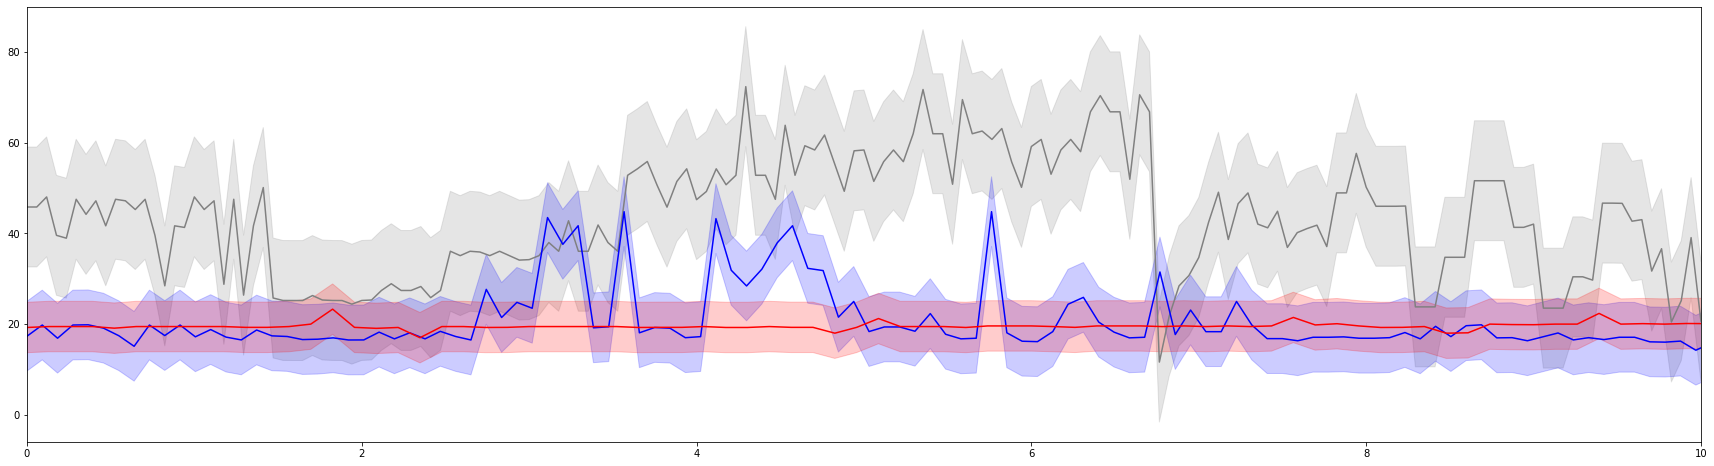

In [61]:
############## Visualize the result #################

xdata = np.arange(774)
xfit1 = np.linspace(0, 15,256)
xfit2 = np.linspace(0, 15,165)
xfit3 = np.linspace(0, 15,116)

# xfit = len(concrete_np_train_X)

plt.figure(figsize=(30,8))
           
# plt.plot(xdata, concrete_np_train_y_list, 'or')

plt.plot(xfit1, y_pred_stradaboost_concrete, '-', color = 'gray')
plt.plot(xfit2, y_pred_stradaboost_housing, '-', color = 'blue')
plt.plot(xfit3, y_pred_stradaboost_auto, '-', color = 'red')



plt.fill_between(xfit1, y_pred_stradaboost_concrete - mse_stradaboost_concrete, y_pred_stradaboost_concrete + mse_stradaboost_concrete,
                 color='gray', alpha=0.2)
plt.fill_between(xfit2, y_pred_stradaboost_housing - mse_stradaboost_housing, y_pred_stradaboost_housing + mse_stradaboost_housing,
                 color='blue', alpha=0.2)
plt.fill_between(xfit3, y_pred_stradaboost_auto - mse_stradaboost_auto, y_pred_stradaboost_auto + mse_stradaboost_auto,
                 color='red', alpha=0.2)


plt.xlim(0, 10);